# Austin Traffic Incident Analysis
----

### Goals                                                                                                                                                    

The goal of this report is to show case austin texas traffic accidents with events that draw people into or mass exit out of Austin such as UT Football games, ACL, Holidays, and even peak times of working days. We will also try to make correlations between other factors and accidents such as weather condition, speed limit, vehicle color, and severity of crash. So we will attempt to answer the following questions.

<b>Is there a correlation between major holidays/breaks and traffic incidents?</b>
 
<b>Is there a correlation between big events such as UT Football games or ACL and traffic incidents?</b>

<b>Does weather have an effect on traffic accidents?</b>

<b>Does the day of the week or the hour of the day have an effect on number of traffic accidents?</b>



### Sources 
This is directly from the source of data -> http://www.ci.austin.tx.us/qact/default.cfm?sort=0

I. Driver's Crash Report (Blue Form) - This report is completed by a driver involved in a traffic crash when the crash is not investigated by a law enforcement officer and apparent damage is $1,000 or more or when the crash resulted in injury or death. Visit the TXDOT website for more information.

II. Crash HS Hot Shot- Collisions that are blocking traffic on high speed roadways, and/ or require life-saving first-aid. Examples: Crashes with a high probability of serious injuries such as rollover, head-on, or very high rate of speed crashes. Collisions blocking High Speed Roadways. HSR (High Speed Roadways) are Interstates, US and State Highways to include frontage roads. Collisions on HSR that have been pulled to the shoulder and are no longer blocking are not a Hot Shot call.

III. Crash Service- Collisions that are not blocking or impeding traffic. Collisions having occurred on private property. Leaving the scene collisions where there are no injuries, lanes, blocked, or any parties chasing the other as a result of the collision.

IV. Crash Urgent- Collisions involving minor injuries and or where minor injuries are suspected. Collisions that are blocking secondary roadways (non-high speed). Collisions having occurred on a HSR (High Speed Roadway), but are no longer blocking (having pulled to the shoulder / parking lot)*See Crash Service*. Collisions involving city vehicles. Traffic Hazard Any traffic hazard on major thoroughfares that may cause a collision, injuries, or otherwise cause undue traffic congestion. For example: pedestrians, stalled vehicles, debris in the roadway, and / or inoperative traffic signals.

V. Traffic Impediment- Impediments located on minor roadways that do not pose an immediate hazardous situation; but if not addressed could cause future problems. For example: railroad arms stuck in the down position, stalled vehicles, and street parking issues that impede traffic.



In [2]:
                                                                                                                                                                                                                                    import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import datetime
import copy
traffic_incident_reports = "data/Real-Time_Traffic_Incident_Reports.csv"

traffic_incident_df = pd.read_csv(traffic_incident_reports)
traffic_incident_df['Published Date'] = pd.to_datetime(traffic_incident_df['Published Date'])
traffic_incident_df = traffic_incident_df.sort_values('Published Date')
traffic_incident_df.head()


Traffic Report ID      Published Date  \
39340  EC10DB9185C9C58A004FA683DD21AFCD16CAD418 2017-09-26 16:11:00   
38501  B25B748A59D8B6B5B5AE3E9D985289E795C874ED 2017-09-26 16:19:00   
38486  B17F4787F2799F2665E5F119FC2F47D569212C4C 2017-09-26 16:55:00   
36174  15D1EE116284B85E5DE3E00564518367FE994DE7 2017-09-26 17:08:00   
37881  89CA91E6C9B28BDCFB629B12758F955D21072594 2017-09-26 17:20:00   

      Issue Reported                  Location   Latitude  Longitude  \
39340      COLLISION  (30.2303264,-97.8199774)  30.230326 -97.819977   
38501  Crash Service  (30.2016097,-97.8530411)  30.201610 -97.853041   
38486   Crash Urgent  (30.3439776,-97.7149716)  30.343978 -97.714972   
36174  Crash Service  (30.3966315,-97.8487281)  30.396632 -97.848728   
37881  Crash Service   (30.339233,-97.7779837)  30.339233 -97.777984   

                              Address    Status                   Status Date  
39340                  5400 Brodie Ln  ARCHIVED  05/18/2018 01:00:00 AM +0000  
38501            8800 Corran Ferry Dr  ARCHIVED  05/18/2018 01:00:00 AM +0000  
38486     N Lamar Blvd Nb & Morrow St  ARCHIVED  05/18/2018 01:00:00 AM +0000  
36174                11000 Fm 2222 Rd  ARCHIVED  05/18/2018 01:00:00 AM +0000  
37881  Mount Bonnell Rd & Tortuga Trl  ARCHIVED  05/18/2018 01:00:00 AM +0000

In [3]:
traffic_incident_df = traffic_incident_df
traffic_incident_df['MonthYear'] = traffic_incident_df['Published Date'].dt.strftime("%y-%m")
traffic_incident_df.head()


Traffic Report ID      Published Date  \
39340  EC10DB9185C9C58A004FA683DD21AFCD16CAD418 2017-09-26 16:11:00   
38501  B25B748A59D8B6B5B5AE3E9D985289E795C874ED 2017-09-26 16:19:00   
38486  B17F4787F2799F2665E5F119FC2F47D569212C4C 2017-09-26 16:55:00   
36174  15D1EE116284B85E5DE3E00564518367FE994DE7 2017-09-26 17:08:00   
37881  89CA91E6C9B28BDCFB629B12758F955D21072594 2017-09-26 17:20:00   

      Issue Reported                  Location   Latitude  Longitude  \
39340      COLLISION  (30.2303264,-97.8199774)  30.230326 -97.819977   
38501  Crash Service  (30.2016097,-97.8530411)  30.201610 -97.853041   
38486   Crash Urgent  (30.3439776,-97.7149716)  30.343978 -97.714972   
36174  Crash Service  (30.3966315,-97.8487281)  30.396632 -97.848728   
37881  Crash Service   (30.339233,-97.7779837)  30.339233 -97.777984   

                              Address    Status                   Status Date  \
39340                  5400 Brodie Ln  ARCHIVED  05/18/2018 01:00:00 AM +0000   
38501            8800 Corran Ferry Dr  ARCHIVED  05/18/2018 01:00:00 AM +0000   
38486     N Lamar Blvd Nb & Morrow St  ARCHIVED  05/18/2018 01:00:00 AM +0000   
36174                11000 Fm 2222 Rd  ARCHIVED  05/18/2018 01:00:00 AM +0000   
37881  Mount Bonnell Rd & Tortuga Trl  ARCHIVED  05/18/2018 01:00:00 AM +0000   

      MonthYear  
39340     17-09  
38501     17-09  
38486     17-09  
36174     17-09  
37881     17-09

In [4]:
traffic_incident_df = traffic_incident_df
traffic_incident_df['WeekYear'] = traffic_incident_df['Published Date'].dt.strftime('%y-%U')
traffic_incident_df.head()

Traffic Report ID      Published Date  \
39340  EC10DB9185C9C58A004FA683DD21AFCD16CAD418 2017-09-26 16:11:00   
38501  B25B748A59D8B6B5B5AE3E9D985289E795C874ED 2017-09-26 16:19:00   
38486  B17F4787F2799F2665E5F119FC2F47D569212C4C 2017-09-26 16:55:00   
36174  15D1EE116284B85E5DE3E00564518367FE994DE7 2017-09-26 17:08:00   
37881  89CA91E6C9B28BDCFB629B12758F955D21072594 2017-09-26 17:20:00   

      Issue Reported                  Location   Latitude  Longitude  \
39340      COLLISION  (30.2303264,-97.8199774)  30.230326 -97.819977   
38501  Crash Service  (30.2016097,-97.8530411)  30.201610 -97.853041   
38486   Crash Urgent  (30.3439776,-97.7149716)  30.343978 -97.714972   
36174  Crash Service  (30.3966315,-97.8487281)  30.396632 -97.848728   
37881  Crash Service   (30.339233,-97.7779837)  30.339233 -97.777984   

                              Address    Status                   Status Date  \
39340                  5400 Brodie Ln  ARCHIVED  05/18/2018 01:00:00 AM +0000   
38501            8800 Corran Ferry Dr  ARCHIVED  05/18/2018 01:00:00 AM +0000   
38486     N Lamar Blvd Nb & Morrow St  ARCHIVED  05/18/2018 01:00:00 AM +0000   
36174                11000 Fm 2222 Rd  ARCHIVED  05/18/2018 01:00:00 AM +0000   
37881  Mount Bonnell Rd & Tortuga Trl  ARCHIVED  05/18/2018 01:00:00 AM +0000   

      MonthYear WeekYear  
39340     17-09    17-39  
38501     17-09    17-39  
38486     17-09    17-39  
36174     17-09    17-39  
37881     17-09    17-39

In [5]:
traffic_incident_df = traffic_incident_df
traffic_incident_df['DayMonthYear'] = traffic_incident_df['Published Date'].dt.strftime('%y-%m-%d')
traffic_incident_df.head()

Traffic Report ID      Published Date  \
39340  EC10DB9185C9C58A004FA683DD21AFCD16CAD418 2017-09-26 16:11:00   
38501  B25B748A59D8B6B5B5AE3E9D985289E795C874ED 2017-09-26 16:19:00   
38486  B17F4787F2799F2665E5F119FC2F47D569212C4C 2017-09-26 16:55:00   
36174  15D1EE116284B85E5DE3E00564518367FE994DE7 2017-09-26 17:08:00   
37881  89CA91E6C9B28BDCFB629B12758F955D21072594 2017-09-26 17:20:00   

      Issue Reported                  Location   Latitude  Longitude  \
39340      COLLISION  (30.2303264,-97.8199774)  30.230326 -97.819977   
38501  Crash Service  (30.2016097,-97.8530411)  30.201610 -97.853041   
38486   Crash Urgent  (30.3439776,-97.7149716)  30.343978 -97.714972   
36174  Crash Service  (30.3966315,-97.8487281)  30.396632 -97.848728   
37881  Crash Service   (30.339233,-97.7779837)  30.339233 -97.777984   

                              Address    Status                   Status Date  \
39340                  5400 Brodie Ln  ARCHIVED  05/18/2018 01:00:00 AM +0000   
38501            8800 Corran Ferry Dr  ARCHIVED  05/18/2018 01:00:00 AM +0000   
38486     N Lamar Blvd Nb & Morrow St  ARCHIVED  05/18/2018 01:00:00 AM +0000   
36174                11000 Fm 2222 Rd  ARCHIVED  05/18/2018 01:00:00 AM +0000   
37881  Mount Bonnell Rd & Tortuga Trl  ARCHIVED  05/18/2018 01:00:00 AM +0000   

      MonthYear WeekYear DayMonthYear  
39340     17-09    17-39     17-09-26  
38501     17-09    17-39     17-09-26  
38486     17-09    17-39     17-09-26  
36174     17-09    17-39     17-09-26  
37881     17-09    17-39     17-09-26

In [6]:
# Need incident counts by given month

monthIncidentDf = traffic_incident_df['MonthYear'].groupby([traffic_incident_df['MonthYear']]).size().reset_index(name='counts')
print(len(monthIncidentDf))
monthIncidentDf.head()

16


MonthYear  counts
0     17-09     710
1     17-10    4740
2     17-11    5884
3     17-12    5860
4     18-01    5593

In [7]:
weekIncidentDf = traffic_incident_df['WeekYear'].groupby([traffic_incident_df['WeekYear']]).size().reset_index(name='counts')
print(len(weekIncidentDf))
weekIncidentDf.head()

65


WeekYear  counts
0    17-39     710
1    17-40     614
2    17-41     666
3    17-42    1237
4    17-43    1576

In [8]:
dayIncidentDfFiltered = traffic_incident_df.loc[traffic_incident_df["Published Date"] > pd.Timestamp(datetime.date(2018, 8, 1))]

dayIncidentDf = dayIncidentDfFiltered['DayMonthYear'].groupby([dayIncidentDfFiltered['DayMonthYear']]).size().reset_index(name='counts')

print(len(dayIncidentDf))
dayIncidentDf.head()

134


DayMonthYear  counts
0     18-08-01     225
1     18-08-02     262
2     18-08-03     243
3     18-08-04     186
4     18-08-05     136

# Question - 
<b>Is there a correlation between major holidays/breaks and traffic incidents?</b>

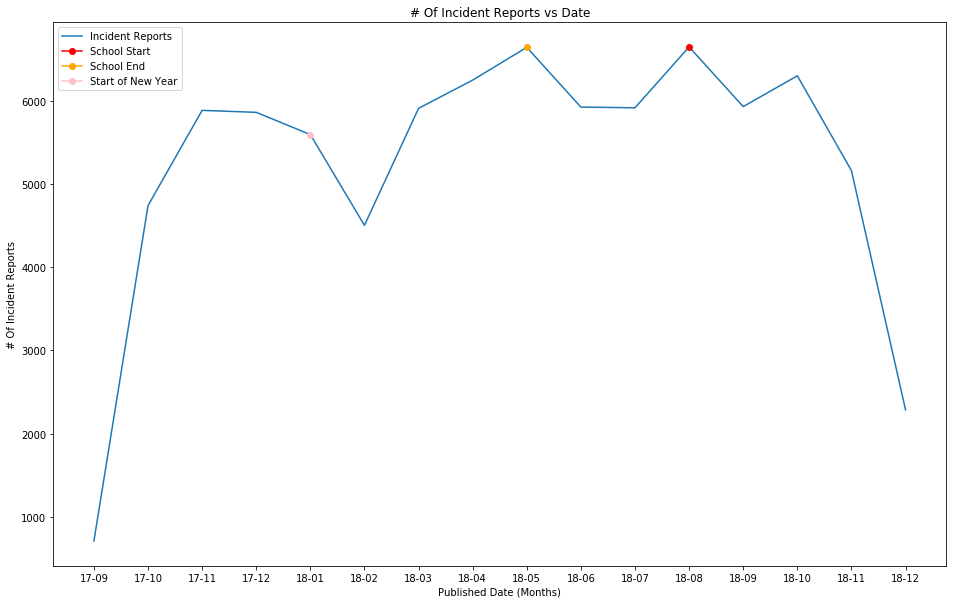

In [9]:
monthYear = "MonthYear"
counts = "counts"
monthX = monthIncidentDf["MonthYear"]
monthY = monthIncidentDf["counts"]

schoolStart = monthIncidentDf.loc[monthIncidentDf["MonthYear"] == "18-08"]
schoolEnd = monthIncidentDf.loc[monthIncidentDf["MonthYear"] == "18-05"]
startOfYear = monthIncidentDf.loc[monthIncidentDf["MonthYear"] == "18-01"]

plt.figure(figsize=(16,10))
plt.title("# Of Incident Reports vs Date")
plt.xlabel("Published Date (Months)")
plt.ylabel("# Of Incident Reports")



plt.plot(monthX, monthY, label = 'Incident Reports')
plt.plot(schoolStart[monthYear], schoolStart[counts], marker='o', markersize=6, color="red", label = 'School Start')
plt.plot(schoolEnd[monthYear], schoolEnd[counts], marker='o', markersize=6, color="orange", label = 'School End')
plt.plot(startOfYear[monthYear], startOfYear[counts], marker='o', markersize=6, color="pink", label = 'Start of New Year')
plt.legend(loc='upper left')
plt.savefig("IncidentReportVsBreakMonthDate.png")
plt.show()


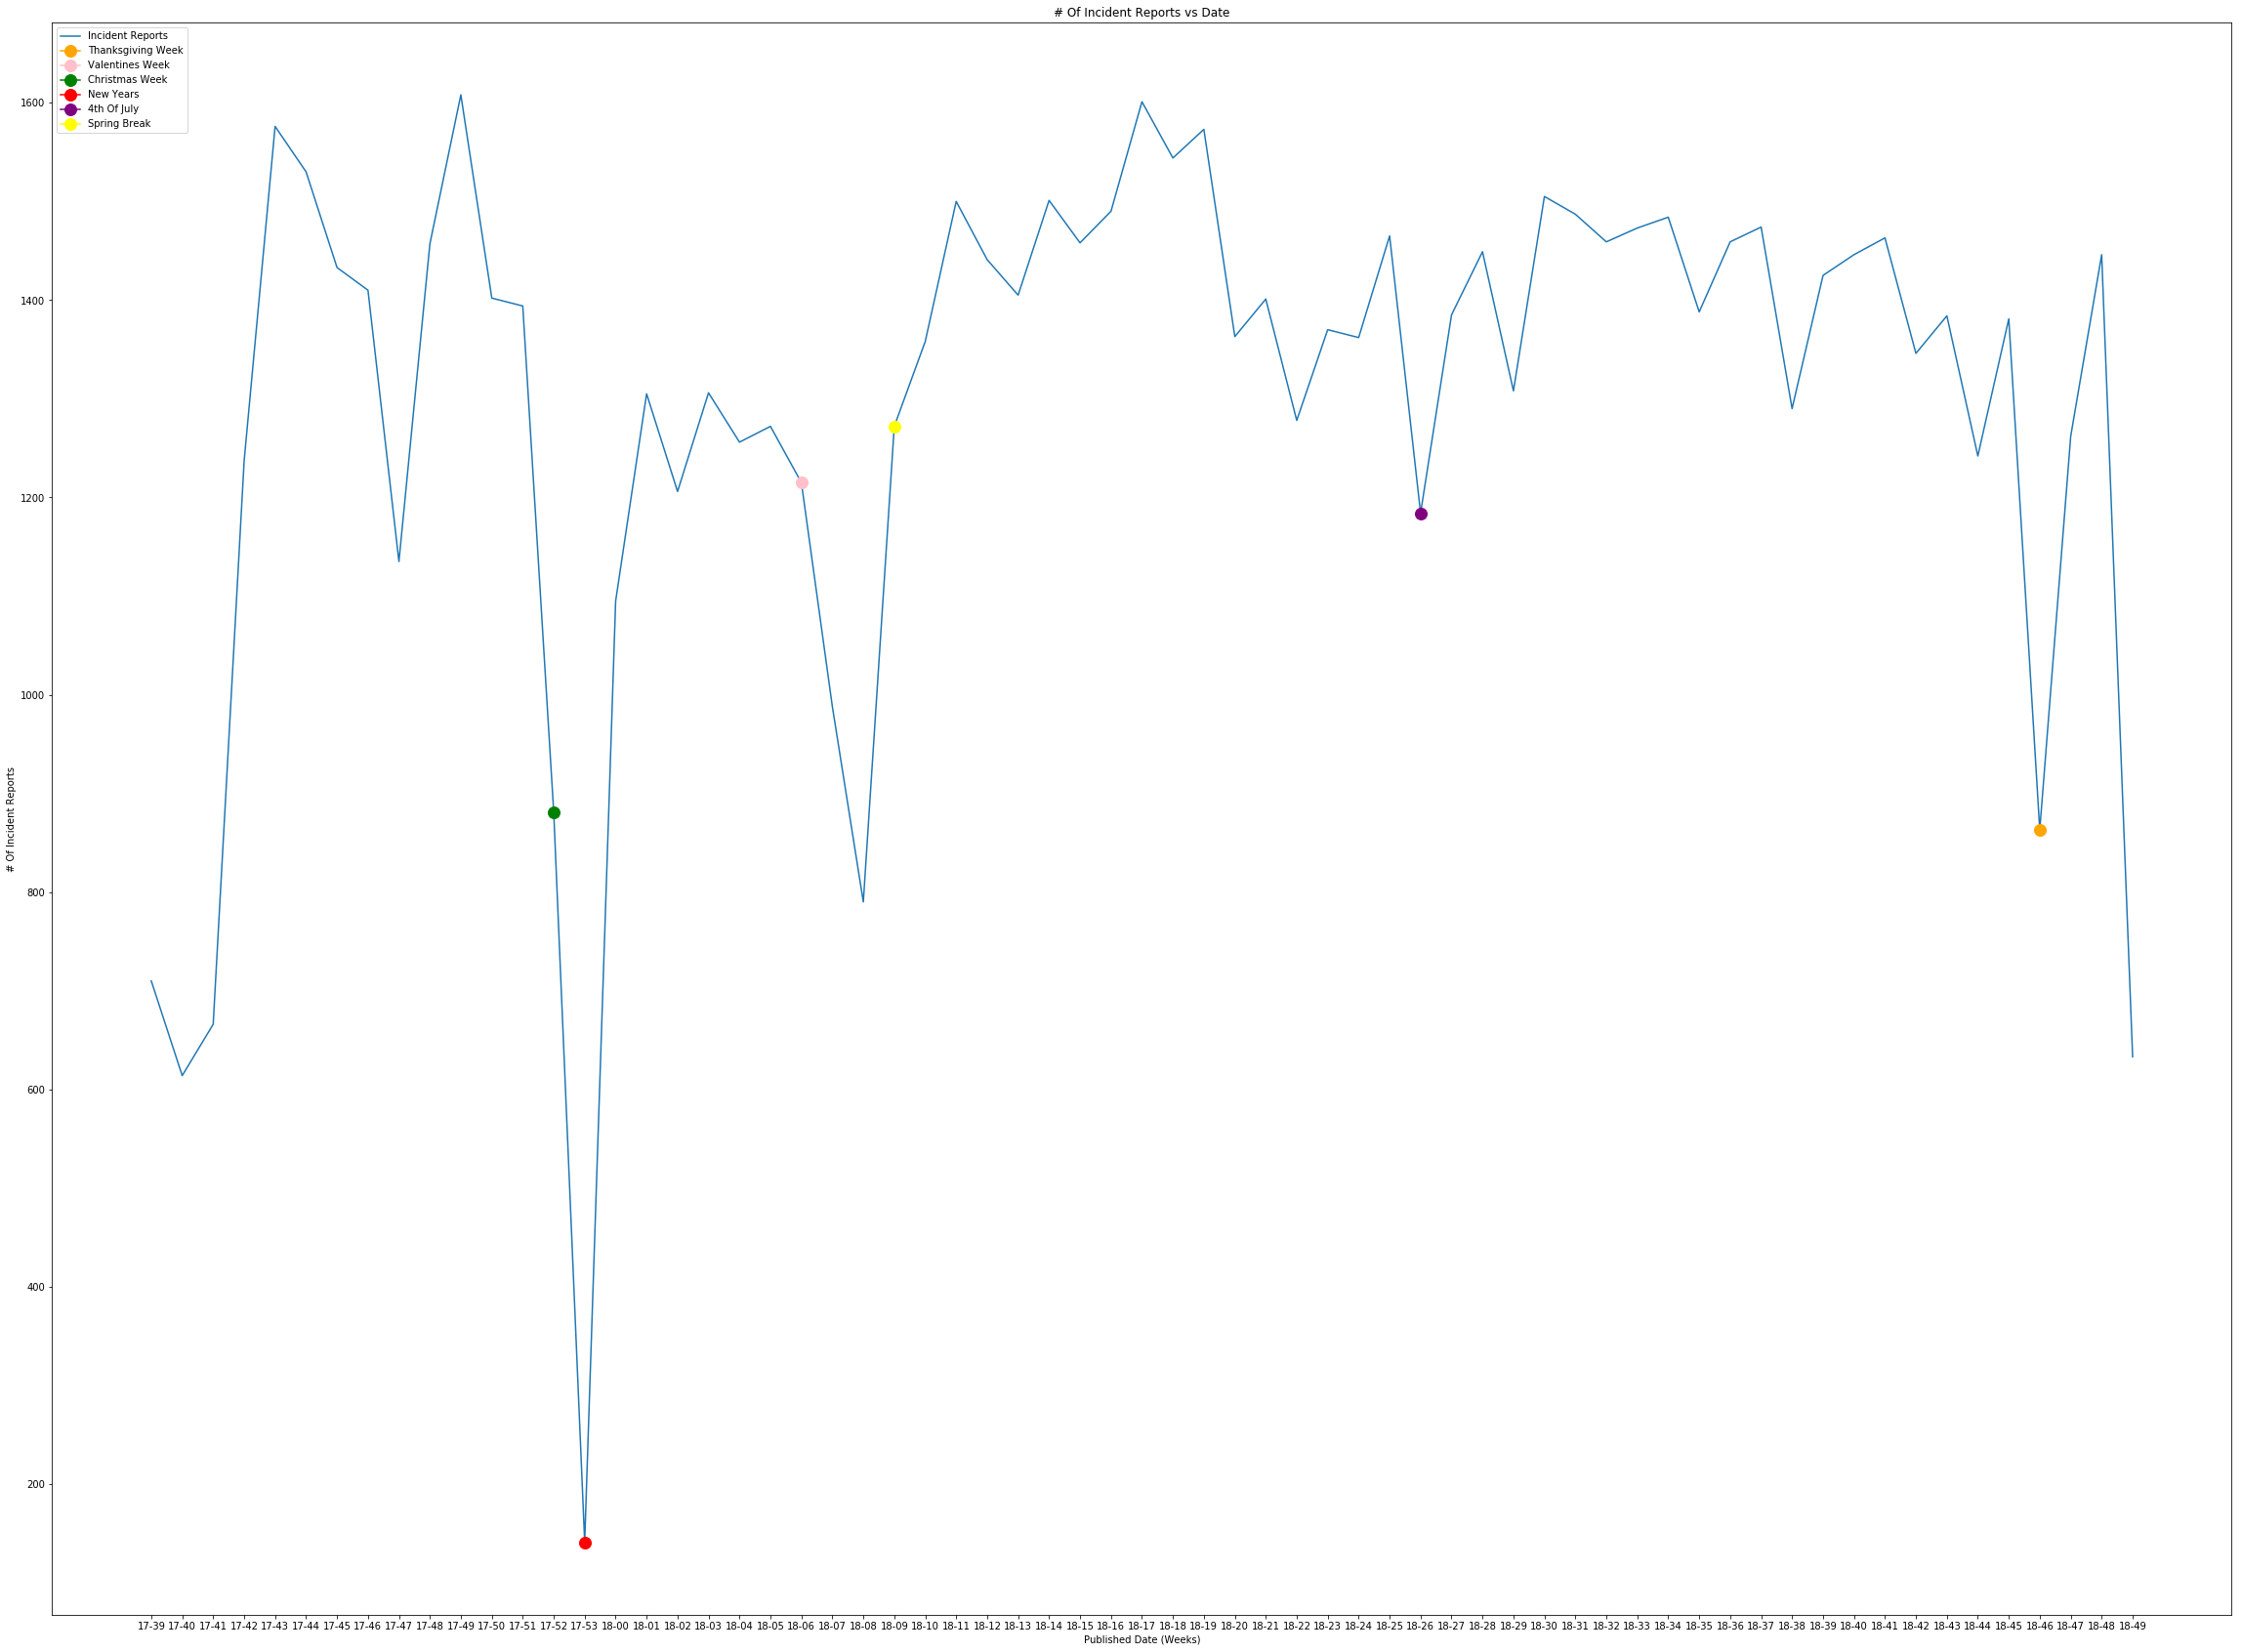

In [10]:
weekYear = "WeekYear"
counts = "counts"
weekX = weekIncidentDf[weekYear]
weekY = weekIncidentDf[counts]

thanksGivingWeek = weekIncidentDf.loc[weekIncidentDf[weekYear] == "18-46"]
valentinesWeek = weekIncidentDf.loc[weekIncidentDf[weekYear] == "18-06"]
julyFourth = weekIncidentDf.loc[weekIncidentDf[weekYear] == "18-26"]
christmasWeek = weekIncidentDf.loc[weekIncidentDf[weekYear] == "17-52"]
newYears = weekIncidentDf.loc[weekIncidentDf[weekYear] == "17-53"]
springBreak = weekIncidentDf.loc[weekIncidentDf[weekYear] == "18-09"]

plt.figure(figsize=(40,30))
plt.title("# Of Incident Reports vs Date")
plt.xlabel("Published Date (Weeks)")
plt.ylabel("# Of Incident Reports")


plt.plot(weekX, weekY, label = 'Incident Reports')
plt.plot(thanksGivingWeek[weekYear], thanksGivingWeek[counts], marker='o', markersize=12, color="orange", label = 'Thanksgiving Week')
plt.plot(valentinesWeek[weekYear], valentinesWeek[counts], marker='o', markersize=12, color="pink", label = 'Valentines Week')
plt.plot(christmasWeek[weekYear], christmasWeek[counts], marker='o', markersize=12, color="green", label = 'Christmas Week')
plt.plot(newYears[weekYear], newYears[counts], marker='o', markersize=12, color="red", label = "New Years")
plt.plot(julyFourth[weekYear], julyFourth[counts], marker='o', markersize=12, color="purple", label = "4th Of July")
plt.plot(springBreak[weekYear], springBreak[counts], marker='o', markersize=12, color="yellow", label = "Spring Break")

plt.legend(loc='upper left')
plt.savefig("IncidentReportVsHolidayWeekDate.png")
plt.show()

# Answer
<b> Looking at the first plot over time, we can see from this year that the number of traffic incidents seem to fall and into their lowest number in February and spike back up after February. When school generally ends around May we see that the number of incidents seems to rise. This could be from all the people getting breaks from all sorts of schools and people leaving/coming to Austin during when school ends. We can see a noticeable drop in June, July as summer kicks in but when August comes around (School Start) we can see that the number of incidents shoots back up comparably to when school generally ends.

We also took a look closer into the given weeks throughout the year and measured the incidents. Here, we could see that on Christmas there was a sharp drop of traffic incidents and the sharpest drop when New Years approached. As the year starts back up there is an increase to normal levels until Valentines week which seems to show a drop after Valentines week and in between Spring Break week. We also notice a considerable drop on the week for 4th of July. The other drop we can see in traffic incidents is actually on Thanksgiving Week but there seems to be a sharp increase before and after Thanksgiving week as people move in and out of Austin.

So in conclusion there does seem to be a correlation between traffic incidents and major holidays. There also seems to be some relationships with some major breaks like when School generally starts or ends.
    </b>

# Question
<b>Is there a correlation between big social events such as UT Football games or ACL and traffic incidents?</b>

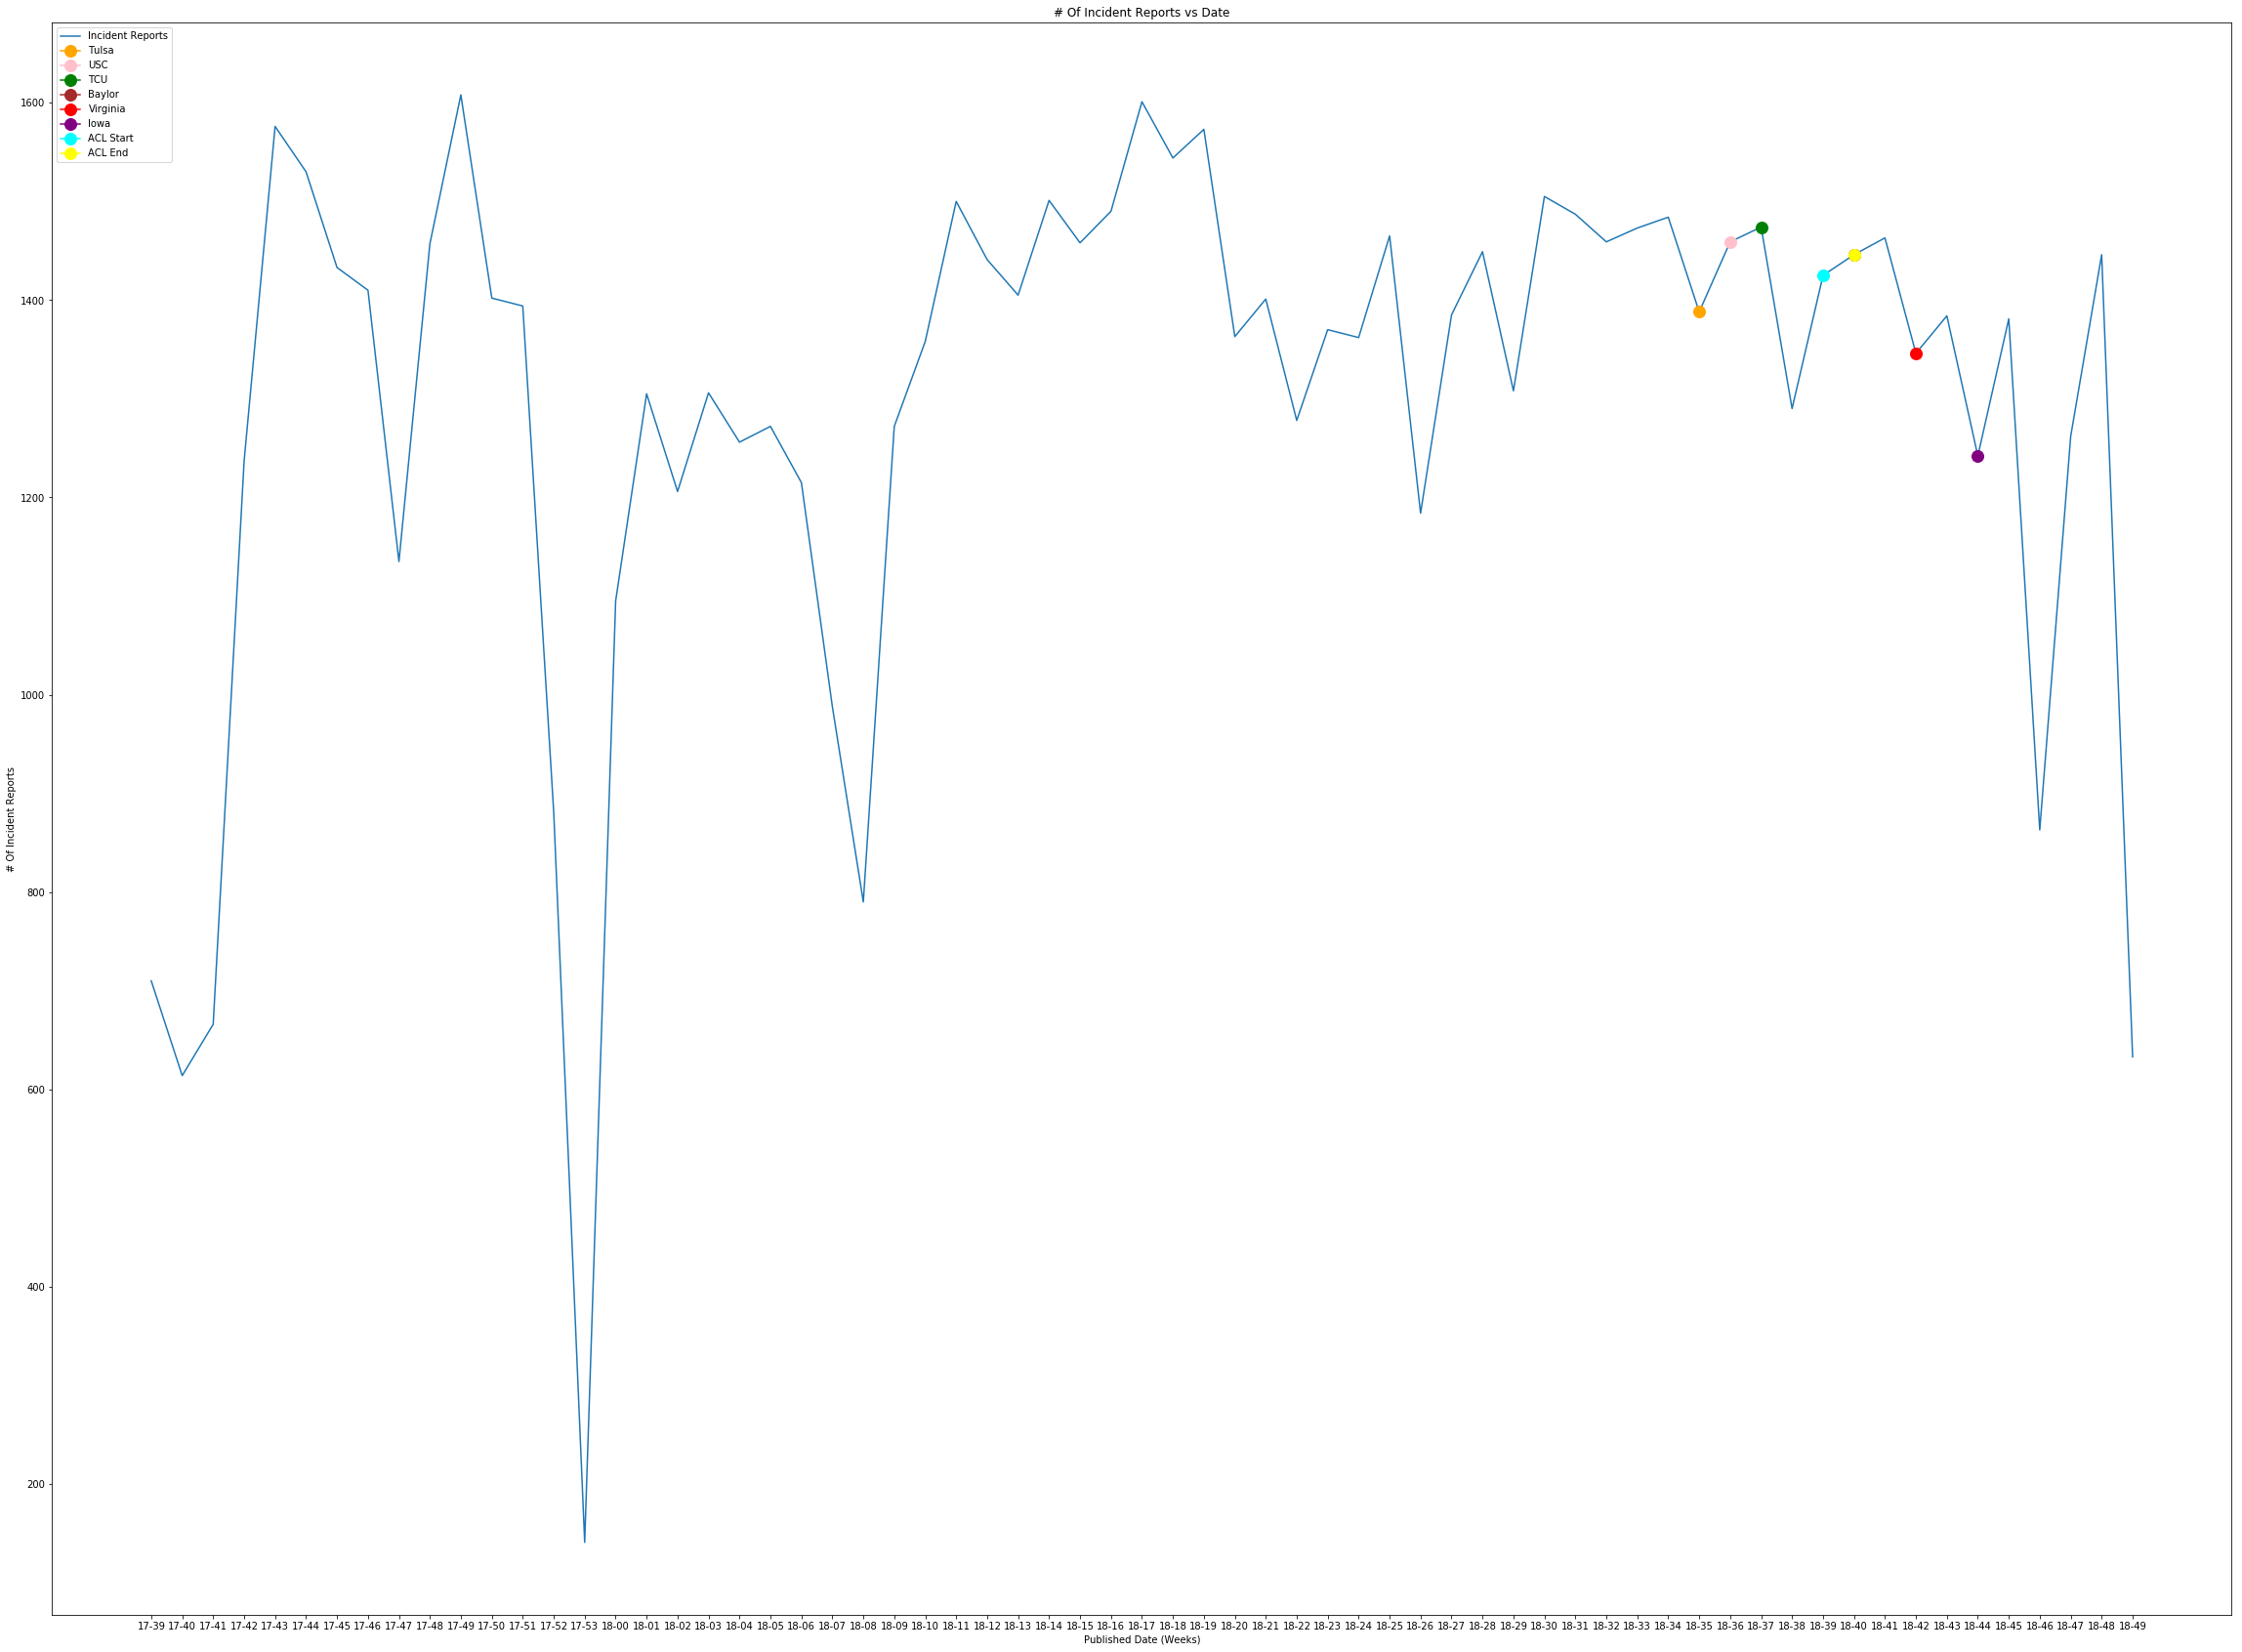

In [11]:
weekYear = "WeekYear"
counts = "counts"
weekX = weekIncidentDf[weekYear]
weekY = weekIncidentDf[counts]

texasTulsa = weekIncidentDf.loc[weekIncidentDf[weekYear] == "18-35"]
texasUSC = weekIncidentDf.loc[weekIncidentDf[weekYear] == "18-36"]
texasTCU = weekIncidentDf.loc[weekIncidentDf[weekYear] == "18-37"]
texasBaylor = weekIncidentDf.loc[weekIncidentDf[weekYear] == "18-40"]
texasVirginia = weekIncidentDf.loc[weekIncidentDf[weekYear] == "18-42"]
texasIowa = weekIncidentDf.loc[weekIncidentDf[weekYear] == "18-44"]
aclStart = weekIncidentDf.loc[weekIncidentDf[weekYear] == "18-39"]
aclEnd = weekIncidentDf.loc[weekIncidentDf[weekYear] == "18-40"]
plt.figure(figsize=(40,30))
plt.title("# Of Incident Reports vs Date")
plt.xlabel("Published Date (Weeks)")
plt.ylabel("# Of Incident Reports")


plt.plot(weekX, weekY, label = 'Incident Reports')
plt.plot(texasTulsa[weekYear], texasTulsa[counts], marker='o', markersize=12, color="orange", label = 'Tulsa')
plt.plot(texasUSC[weekYear], texasUSC[counts], marker='o', markersize=12, color="pink", label = 'USC')
plt.plot(texasTCU[weekYear], texasTCU[counts], marker='o', markersize=12, color="green", label = 'TCU')
plt.plot(texasBaylor[weekYear], texasBaylor[counts], marker='o', markersize=12, color="brown", label = 'Baylor')
plt.plot(texasVirginia[weekYear], texasVirginia[counts], marker='o', markersize=12, color="red", label = 'Virginia')
plt.plot(texasIowa[weekYear], texasIowa[counts], marker='o', markersize=12, color="purple", label = 'Iowa')
plt.plot(aclStart[weekYear], aclStart[counts], marker='o', markersize=12, color="cyan", label = 'ACL Start')
plt.plot(aclEnd[weekYear], aclEnd[counts], marker='o', markersize=12, color="yellow", label = 'ACL End')
plt.legend(loc='upper left')
plt.savefig("IncidentReportVsWeekDate.png")
plt.show()


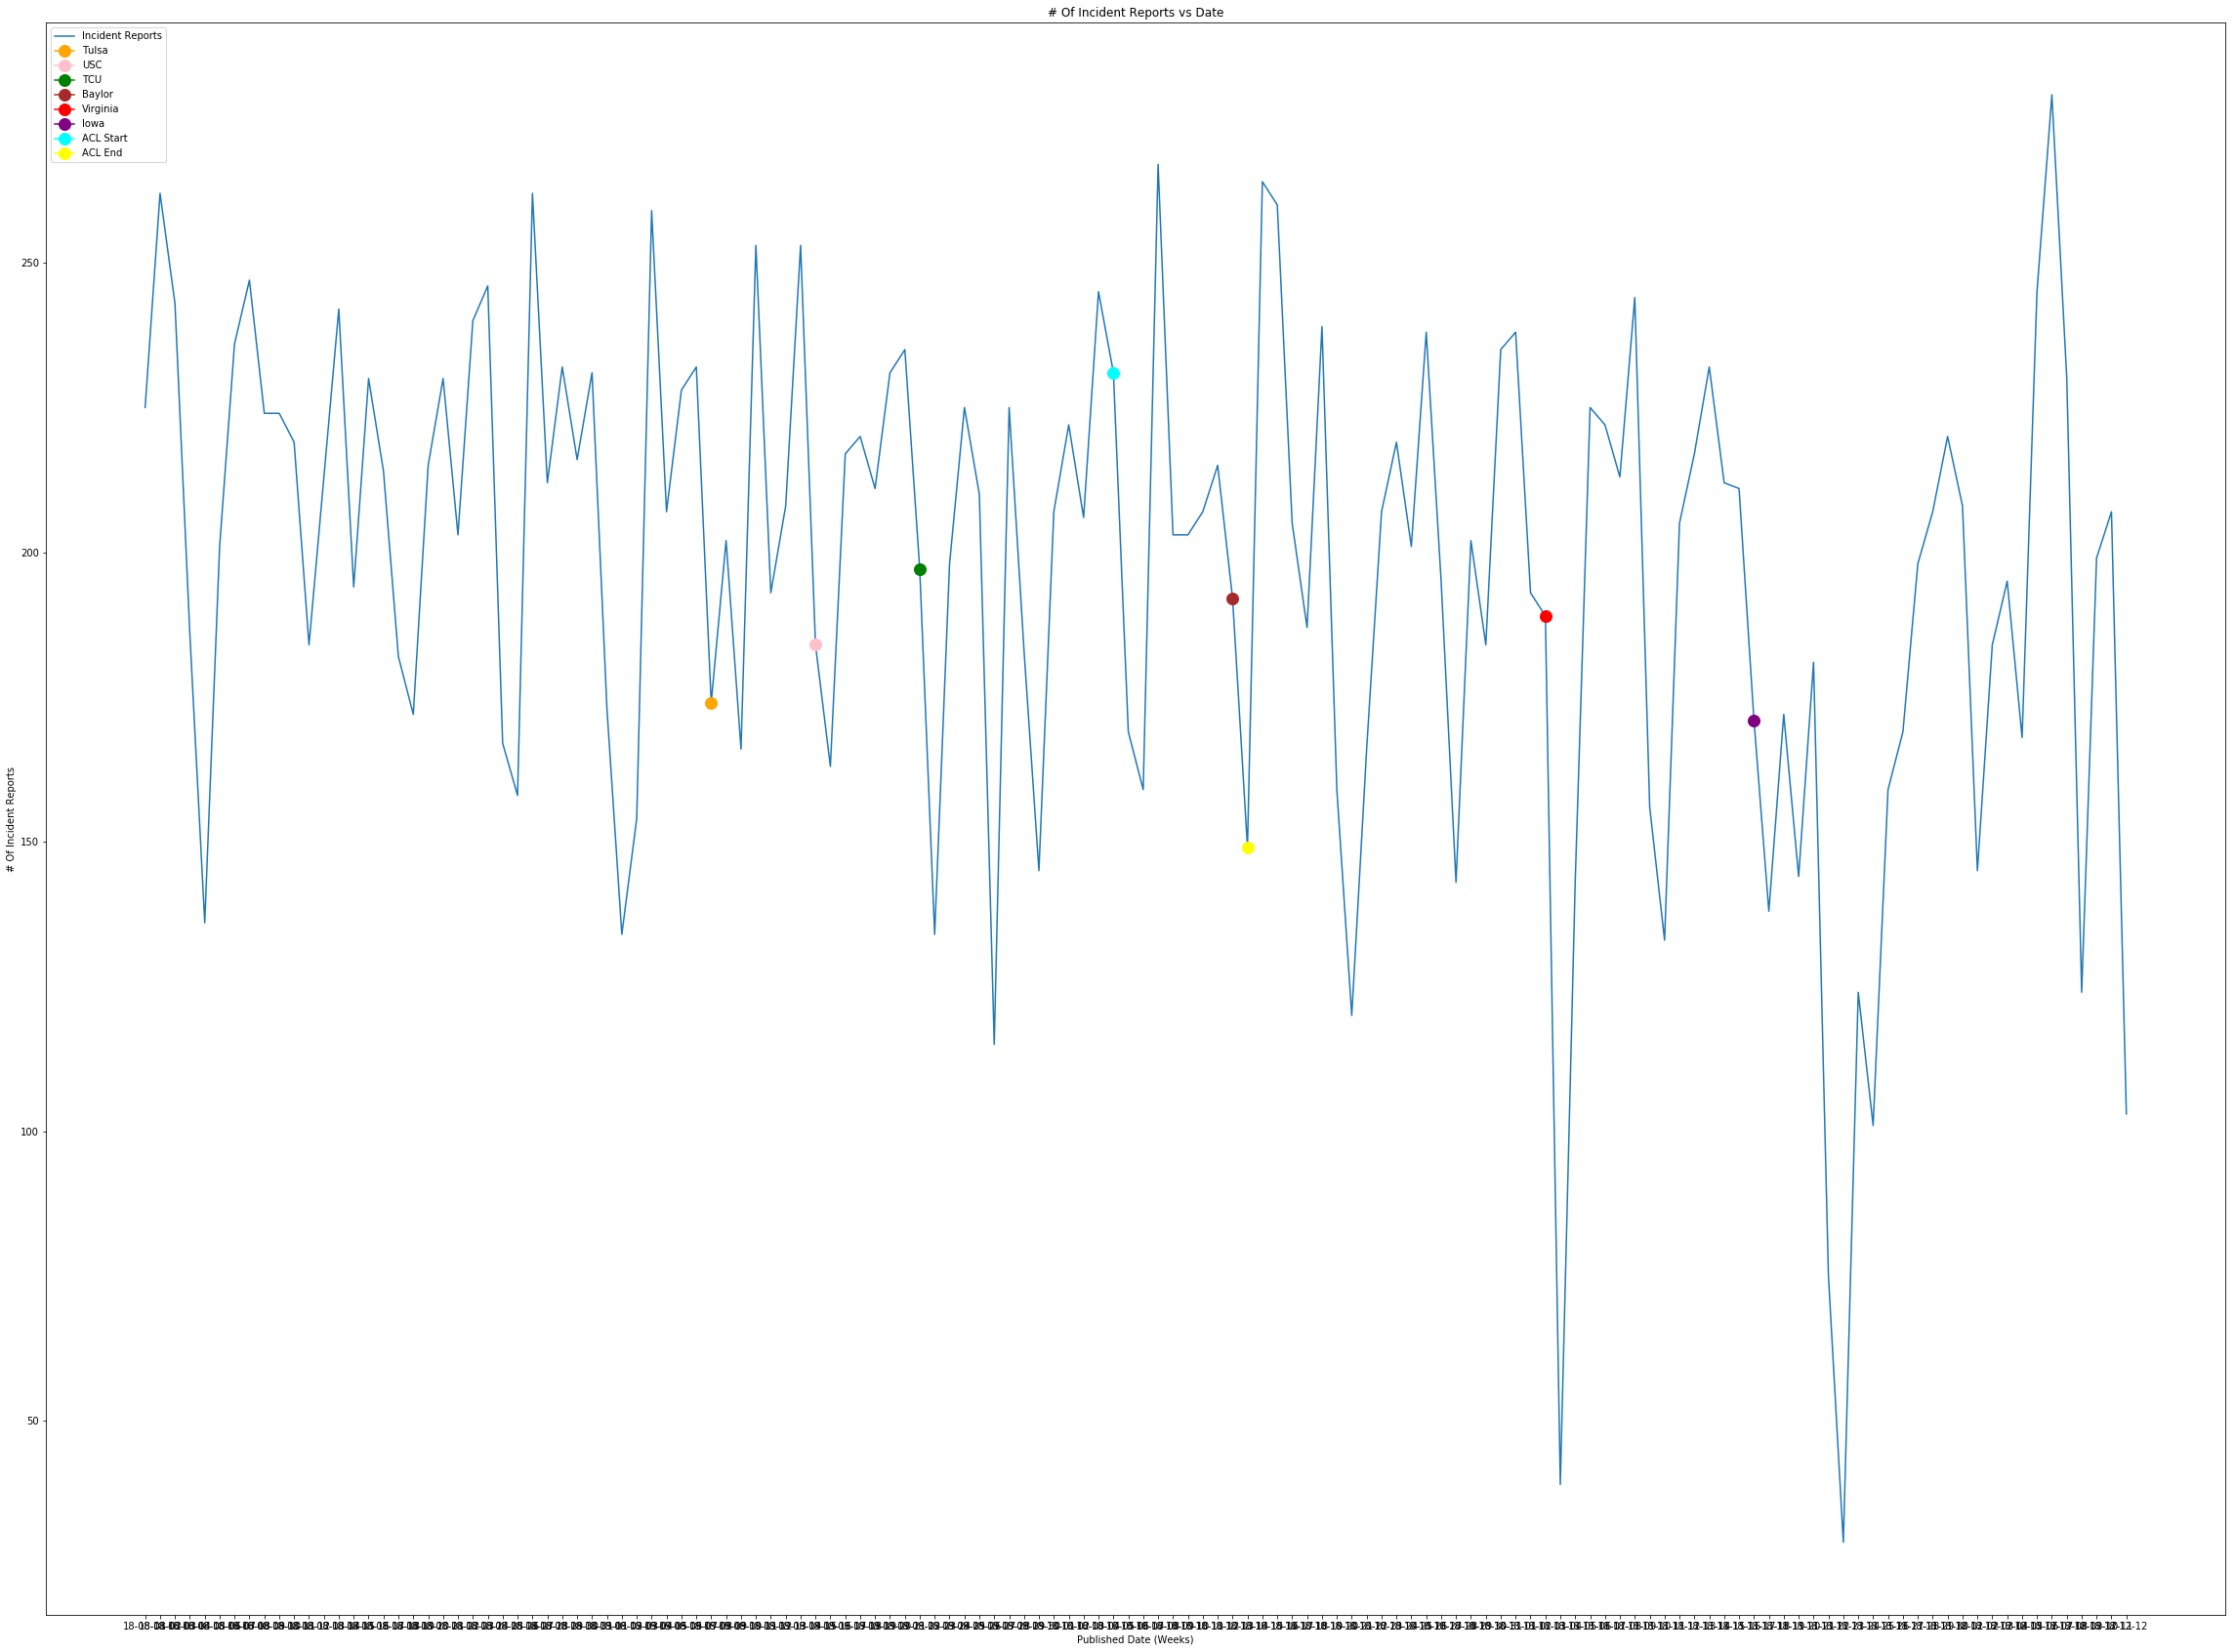

In [12]:
dayMonthYear = "DayMonthYear"
counts = "counts"


weekX = dayIncidentDf[dayMonthYear]
weekY = dayIncidentDf[counts]

texasTulsa = dayIncidentDf.loc[dayIncidentDf[dayMonthYear] == "18-09-08"]
texasUSC = dayIncidentDf.loc[dayIncidentDf[dayMonthYear] == "18-09-15"]
texasTCU = dayIncidentDf.loc[dayIncidentDf[dayMonthYear] == "18-09-22"]
texasBaylor = dayIncidentDf.loc[dayIncidentDf[dayMonthYear] == "18-10-13"]
texasVirginia = dayIncidentDf.loc[dayIncidentDf[dayMonthYear] == "18-11-03"]
texasIowa = dayIncidentDf.loc[dayIncidentDf[dayMonthYear] == "18-11-17"]
aclStart = dayIncidentDf.loc[dayIncidentDf[dayMonthYear] == "18-10-05"]
aclEnd = dayIncidentDf.loc[dayIncidentDf[dayMonthYear] == "18-10-14"]
plt.figure(figsize=(40,30))
plt.title("# Of Incident Reports vs Date")
plt.xlabel("Published Date (Weeks)")
plt.ylabel("# Of Incident Reports")


plt.plot(weekX, weekY, label = 'Incident Reports')
plt.plot(texasTulsa[dayMonthYear], texasTulsa[counts], marker='o', markersize=12, color="orange", label = 'Tulsa')
plt.plot(texasUSC[dayMonthYear], texasUSC[counts], marker='o', markersize=12, color="pink", label = 'USC')
plt.plot(texasTCU[dayMonthYear], texasTCU[counts], marker='o', markersize=12, color="green", label = 'TCU')
plt.plot(texasBaylor[dayMonthYear], texasBaylor[counts], marker='o', markersize=12, color="brown", label = 'Baylor')
plt.plot(texasVirginia[dayMonthYear], texasVirginia[counts], marker='o', markersize=12, color="red", label = 'Virginia')
plt.plot(texasIowa[dayMonthYear], texasIowa[counts], marker='o', markersize=12, color="purple", label = 'Iowa')
plt.plot(aclStart[dayMonthYear], aclStart[counts], marker='o', markersize=12, color="cyan", label = 'ACL Start')
plt.plot(aclEnd[dayMonthYear], aclEnd[counts], marker='o', markersize=12, color="yellow", label = 'ACL End')
plt.legend(loc='upper left')
plt.savefig("IncidentReportVsDay.png")
plt.show()


# Answer
<b>Interesting to see and note how after a football game there seems to be a short spike of traffic incidents roughly 10-20 more. There does not seem to be a correlation from this year's UT Football game data in Austin to correlate with traffic incidents. Even looking at ACL, it does not  Looking into the day time </b>

<b>Question - </b>
Does weather have an effect on traffic accidents?

In [13]:
firstCrashes = "data/2010-2012-Crashes.csv"
secondCrashes = "data/2013-2015-Crashes.csv"
thirdCrashes = "data/2016-2018-Crashes.csv"

listDf = []

firstCrashesDf = pd.read_csv(firstCrashes)
secondCrashesDf = pd.read_csv(secondCrashes)
thirdCrashesDf = pd.read_csv(thirdCrashes)

listDf.append(firstCrashesDf)
listDf.append(secondCrashesDf)
listDf.append(thirdCrashesDf)

crashesDf = pd.concat(listDf, axis = 0, ignore_index = True)
crashesDf.head()



Crash ID    City Crash Severity  Crash Time  Crash Year Day of Week  \
0  11154420  Austin    Not Injured        2216        2010      Friday   
1  11165129  Austin    Not Injured         117        2010      Friday   
2  11224151  Austin    Not Injured         408        2010      Friday   
3  11224151  Austin    Not Injured         408        2010      Friday   
4  11276260  Austin    Not Injured         137        2010      Friday   

   Speed Limit Weather Condition Vehicle Color  
0           30             Clear           Red  
1           30             Clear         Green  
2           55             Clear         Beige  
3           55             Clear          Blue  
4           30             Clear         Black

In [14]:
weatherDf = crashesDf['Weather Condition'].groupby([crashesDf['Weather Condition']]).size().reset_index(name='Count')
weatherDf.head()


Weather Condition   Count
0             Blowing Sand/Snow      28
1                         Clear  214965
2                        Cloudy   37284
3                           Fog     615
4  Other (Explain In Narrative)     217

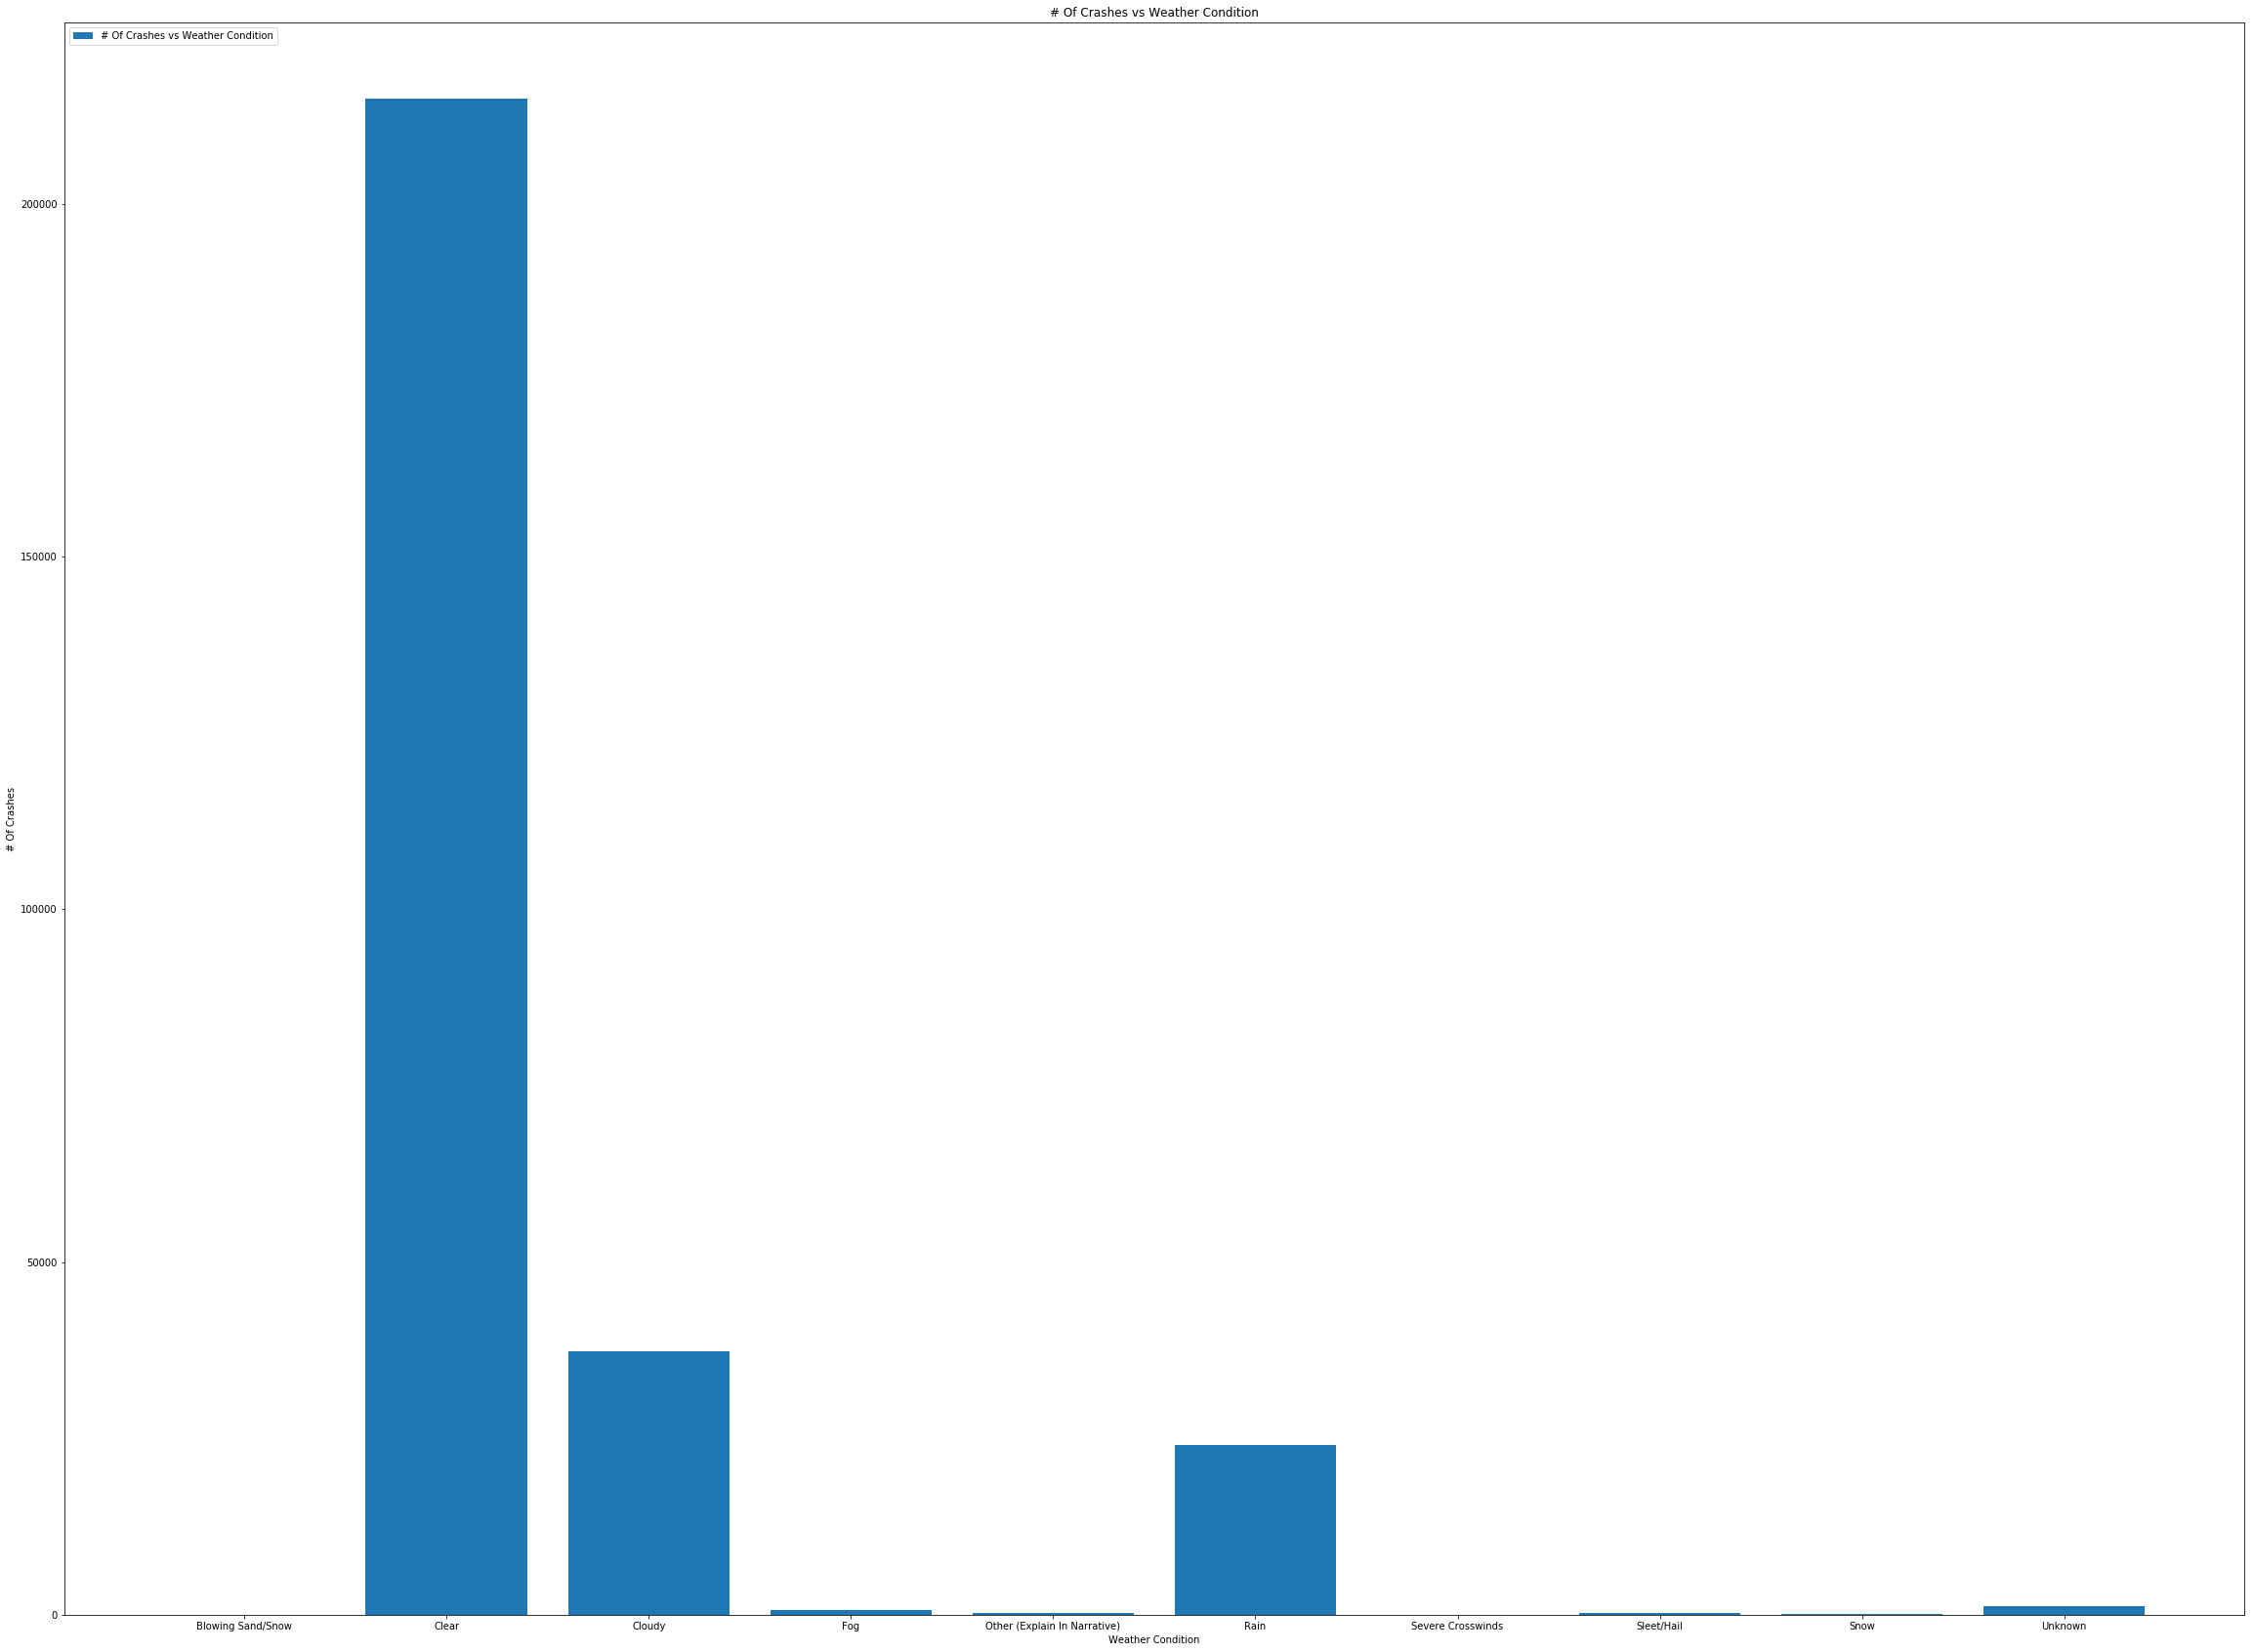

In [15]:
weatherCondition = "Weather Condition"
count = "Count"


weatherX = weatherDf[weatherCondition]
weatherY = weatherDf[count]

plt.figure(figsize=(40,30))
plt.title("# Of Crashes vs Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("# Of Crashes")


plt.bar(weatherX, weatherY, label = '# Of Crashes vs Weather Condition')
plt.legend(loc='upper left')
plt.savefig("CrashesVsWeather.png")
plt.show()

In [16]:
crashSeverityDf = crashesDf['Crash Severity'].groupby([crashesDf['Crash Severity']]).size().reset_index(name='Count')
crashSeverityDf.head()

Crash Severity   Count
0                     Killed    1225
1  Non-Incapacitating Injury   60959
2                Not Injured  138565
3            Possible Injury   63003
4   Suspected Serious Injury    8257

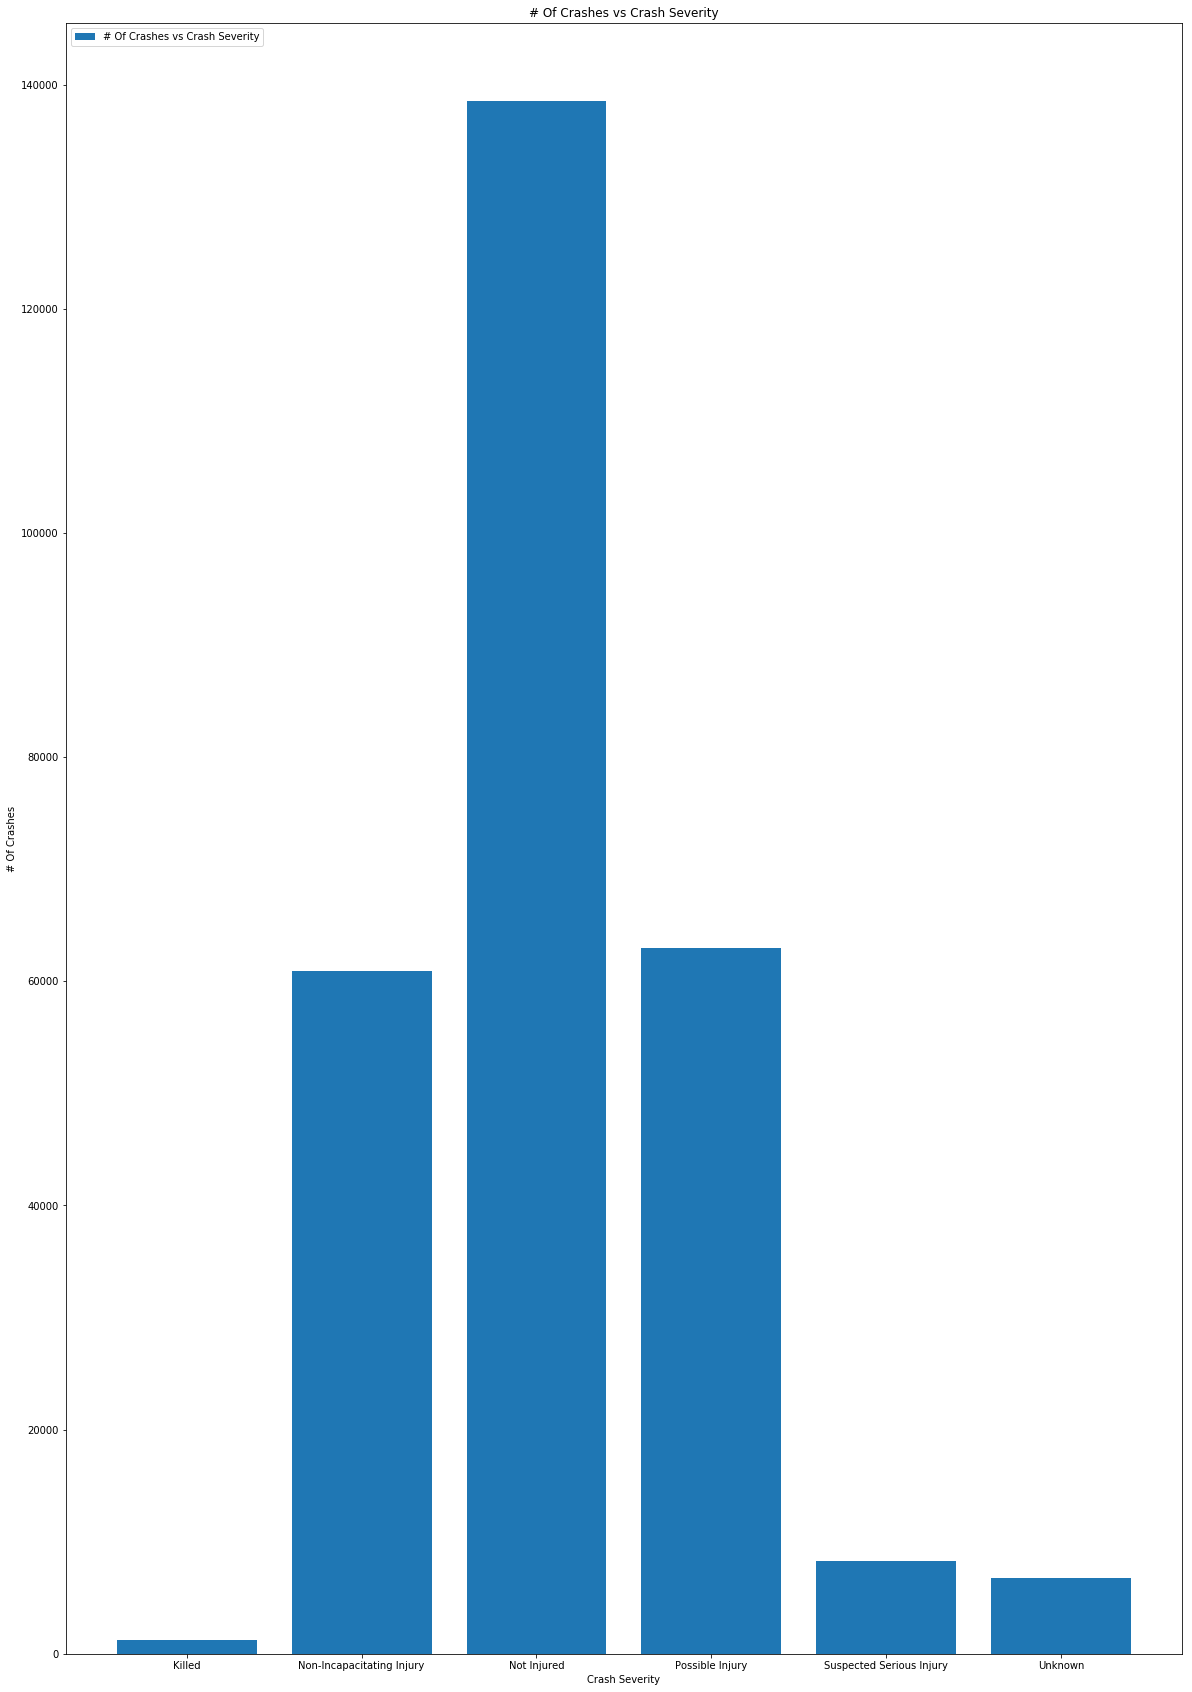

In [17]:
crashSeverity = "Crash Severity"
count = "Count"


crashSeverityX = crashSeverityDf[crashSeverity]
crashSeverityY = crashSeverityDf[count]

plt.figure(figsize=(20,30))
plt.title("# Of Crashes vs Crash Severity")
plt.xlabel("Crash Severity")
plt.ylabel("# Of Crashes")


plt.bar(crashSeverityX, crashSeverityY, label = '# Of Crashes vs Crash Severity')
plt.legend(loc='upper left')
plt.savefig("CrashesVsSeverity.png")
plt.show()

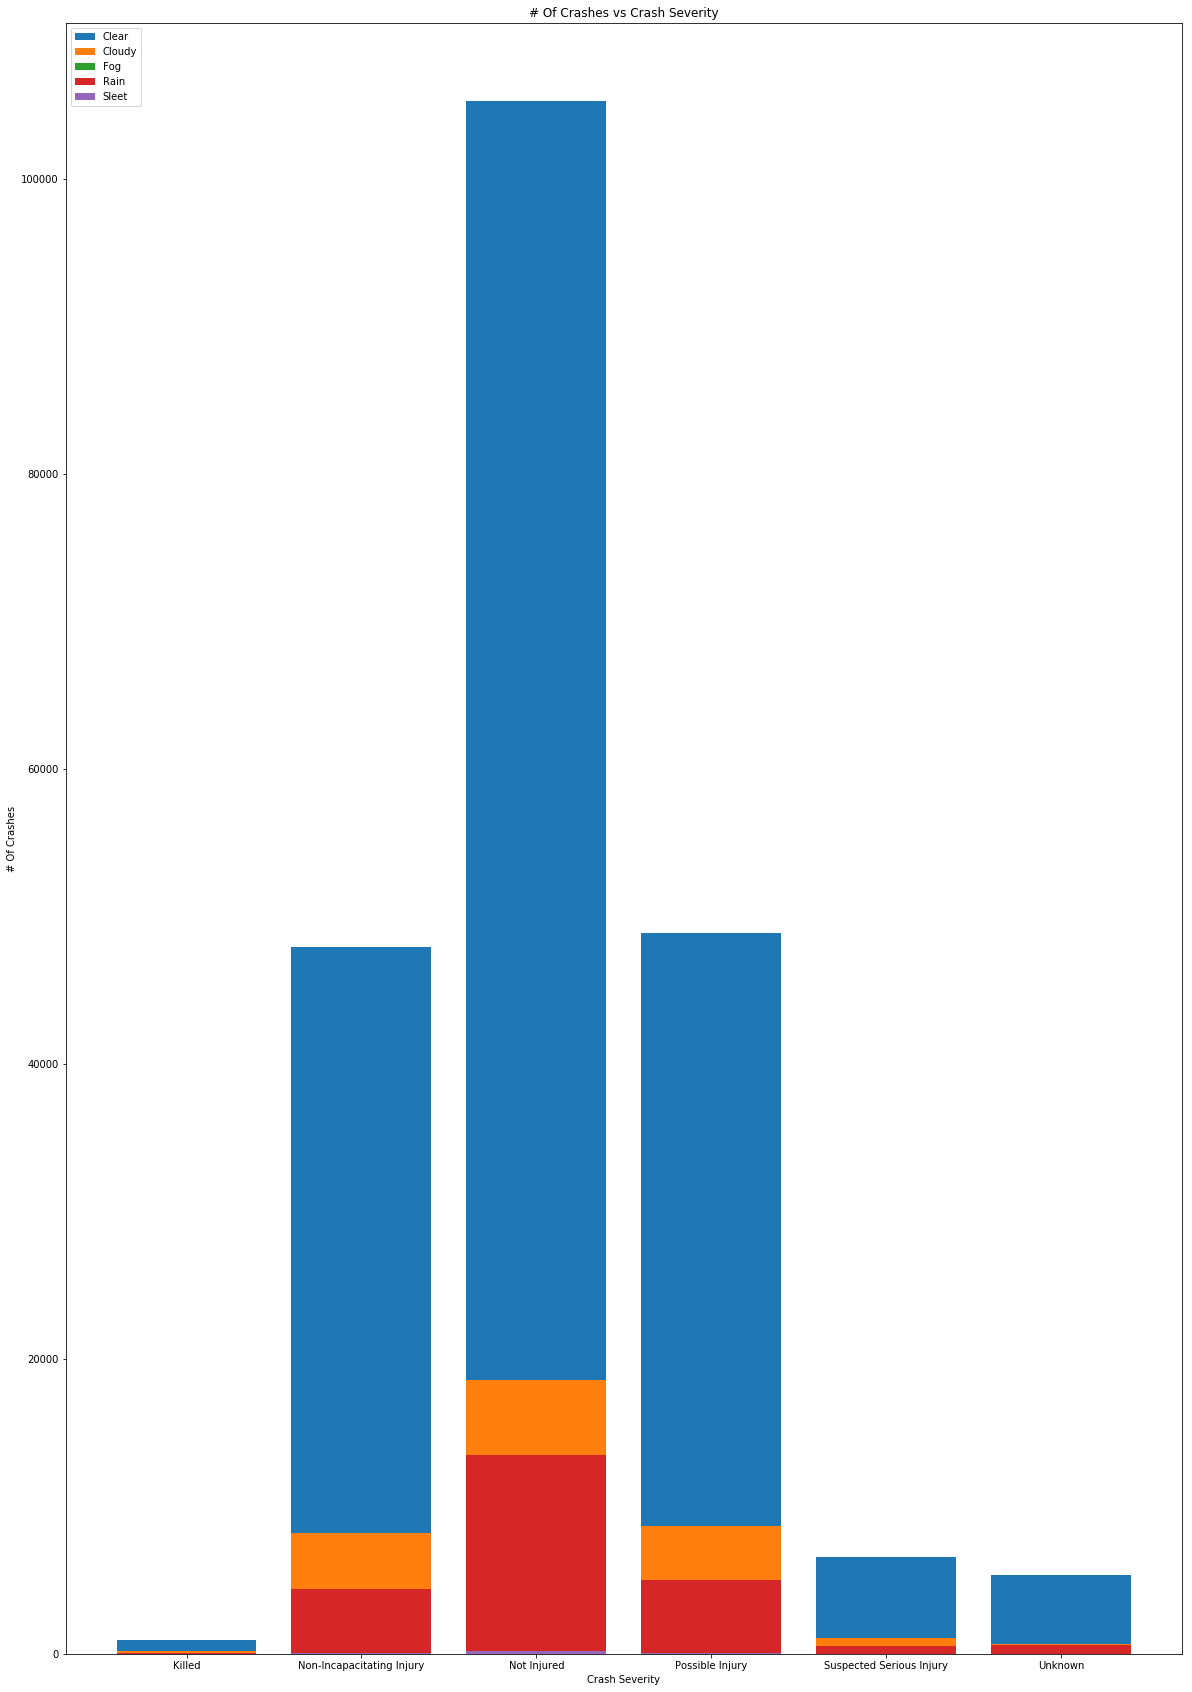

In [18]:
crashSeverity = "Crash Severity"
count = "Count"


clear = crashesDf.loc[crashesDf["Weather Condition"] == "Clear"].groupby([crashesDf['Crash Severity']]).size().reset_index(name='Count')
cloudy = crashesDf.loc[crashesDf["Weather Condition"] == "Cloudy"].groupby([crashesDf['Crash Severity']]).size().reset_index(name='Count')
fog = crashesDf.loc[crashesDf["Weather Condition"] == "Fog"].groupby([crashesDf['Crash Severity']]).size().reset_index(name='Count')
rain = crashesDf.loc[crashesDf["Weather Condition"] == "Rain"].groupby([crashesDf['Crash Severity']]).size().reset_index(name='Count')
sleet = crashesDf.loc[crashesDf["Weather Condition"] == "Sleet/Hail"].groupby([crashesDf['Crash Severity']]).size().reset_index(name='Count')


crashSeverityX = crashSeverityDf[crashSeverity]
crashSeverityY = crashSeverityDf[count]

plt.figure(figsize=(20,30))
plt.title("# Of Crashes vs Crash Severity")
plt.xlabel("Crash Severity")
plt.ylabel("# Of Crashes")


plt.bar(clear[crashSeverity], clear[count], label = 'Clear')
plt.bar(cloudy[crashSeverity], cloudy[count], label = 'Cloudy')
plt.bar(fog[crashSeverity], fog[count], label = 'Fog')
plt.bar(rain[crashSeverity], rain[count], label = 'Rain')
plt.bar(sleet[crashSeverity], sleet[count], label = 'Sleet')

plt.legend(loc='upper left')
plt.savefig("CrashesVsSeverity.png")
plt.show()

In [19]:
crashesDf['Hour Crash Time'] = (crashesDf['Crash Time'] / 100).astype(int)

crashesDf.head()

Crash ID    City Crash Severity  Crash Time  Crash Year Day of Week  \
0  11154420  Austin    Not Injured        2216        2010      Friday   
1  11165129  Austin    Not Injured         117        2010      Friday   
2  11224151  Austin    Not Injured         408        2010      Friday   
3  11224151  Austin    Not Injured         408        2010      Friday   
4  11276260  Austin    Not Injured         137        2010      Friday   

   Speed Limit Weather Condition Vehicle Color  Hour Crash Time  
0           30             Clear           Red               22  
1           30             Clear         Green                1  
2           55             Clear         Beige                4  
3           55             Clear          Blue                4  
4           30             Clear         Black                1

In [20]:
hourCrashTimeDf = crashesDf['Hour Crash Time'].groupby([crashesDf['Hour Crash Time']]).size().reset_index(name='Count')
hourCrashTimeDf.head()

Hour Crash Time  Count
0                0   5836
1                1   5140
2                2   8131
3                3   4241
4                4   2464

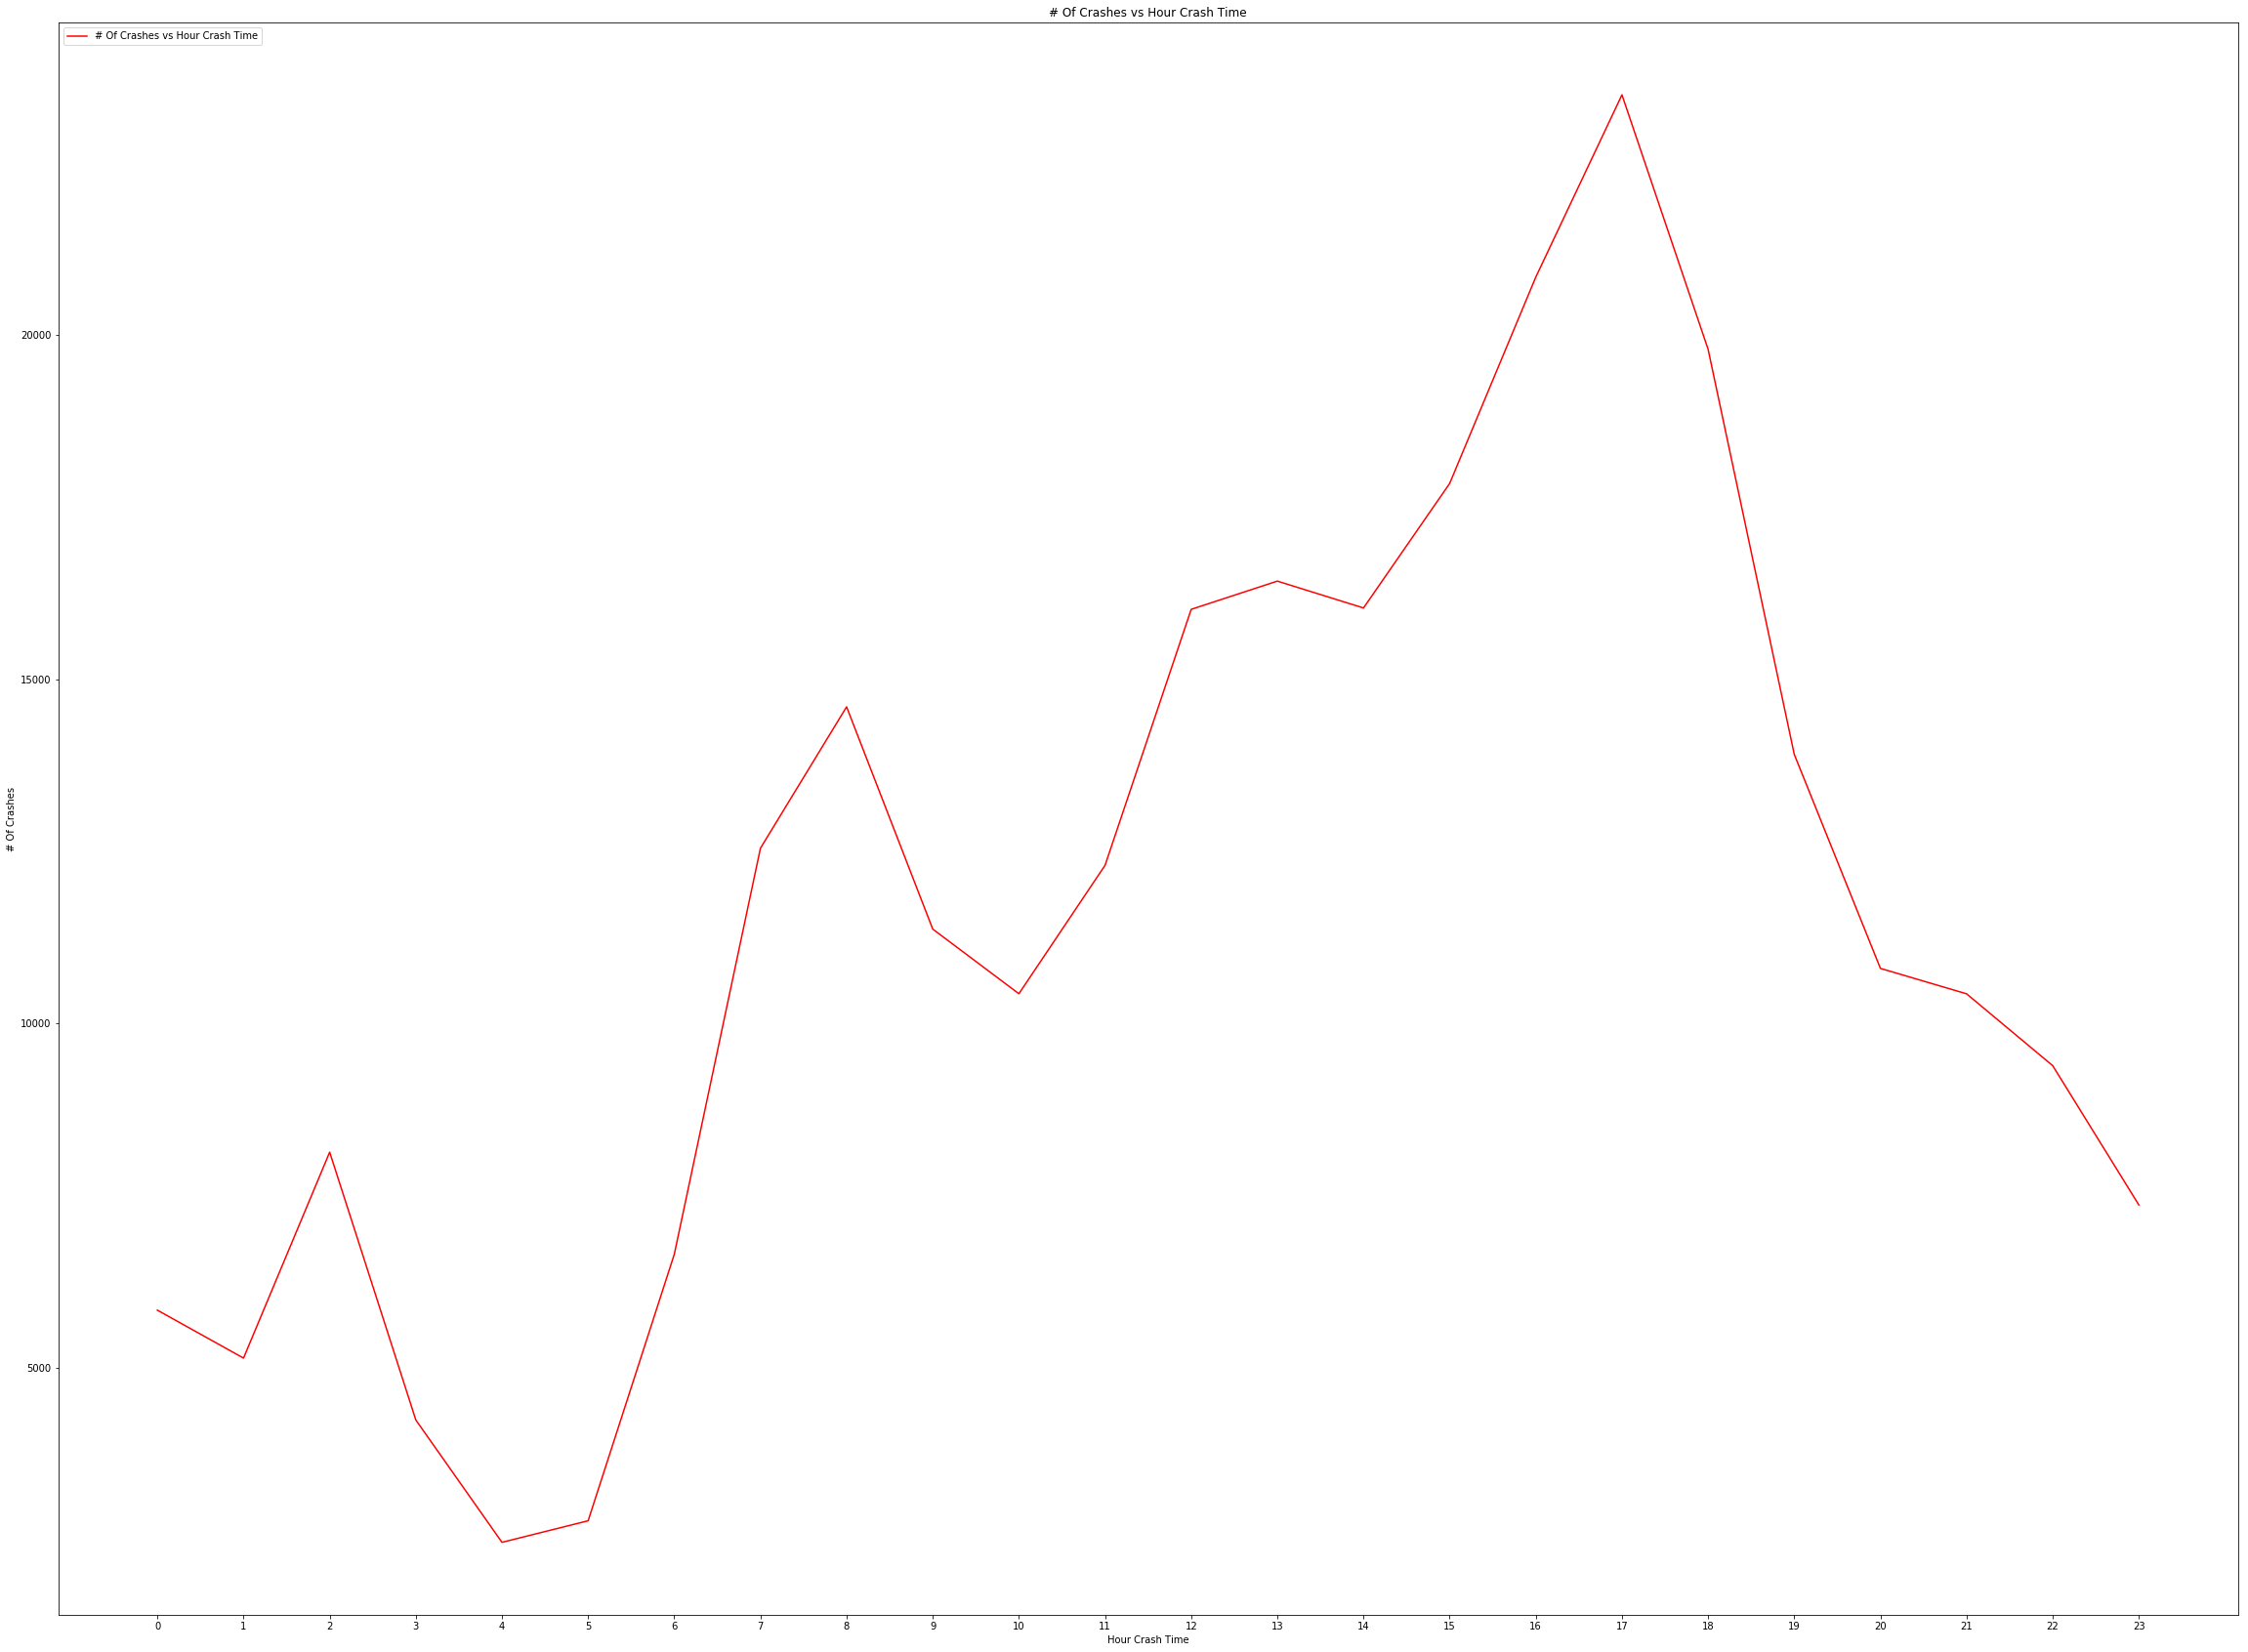

In [21]:
hourCrashTime = "Hour Crash Time"
count = "Count"


hourCrashTimeX = hourCrashTimeDf[hourCrashTime]
hourCrashTimeY = hourCrashTimeDf[count]

plt.figure(figsize=(40,30))
plt.title("# Of Crashes vs Hour Crash Time")
plt.xlabel("Hour Crash Time")
plt.ylabel("# Of Crashes")


plt.plot(hourCrashTimeX, hourCrashTimeY, label = '# Of Crashes vs Hour Crash Time', color = 'red')
plt.xticks(np.arange(min(hourCrashTimeX), max(hourCrashTimeX)+1, 1.0))
plt.legend(loc='upper left')
plt.savefig("CrashesVsHourCrashTime.png")
plt.show()

In [22]:
crashTimeDf = crashesDf['Crash Time'].groupby([crashesDf['Crash Time']]).size().reset_index(name='Count')
crashTimeDf.head()


Crash Time  Count
0           0    167
1           1    150
2           2     96
3           3     86
4           4     70

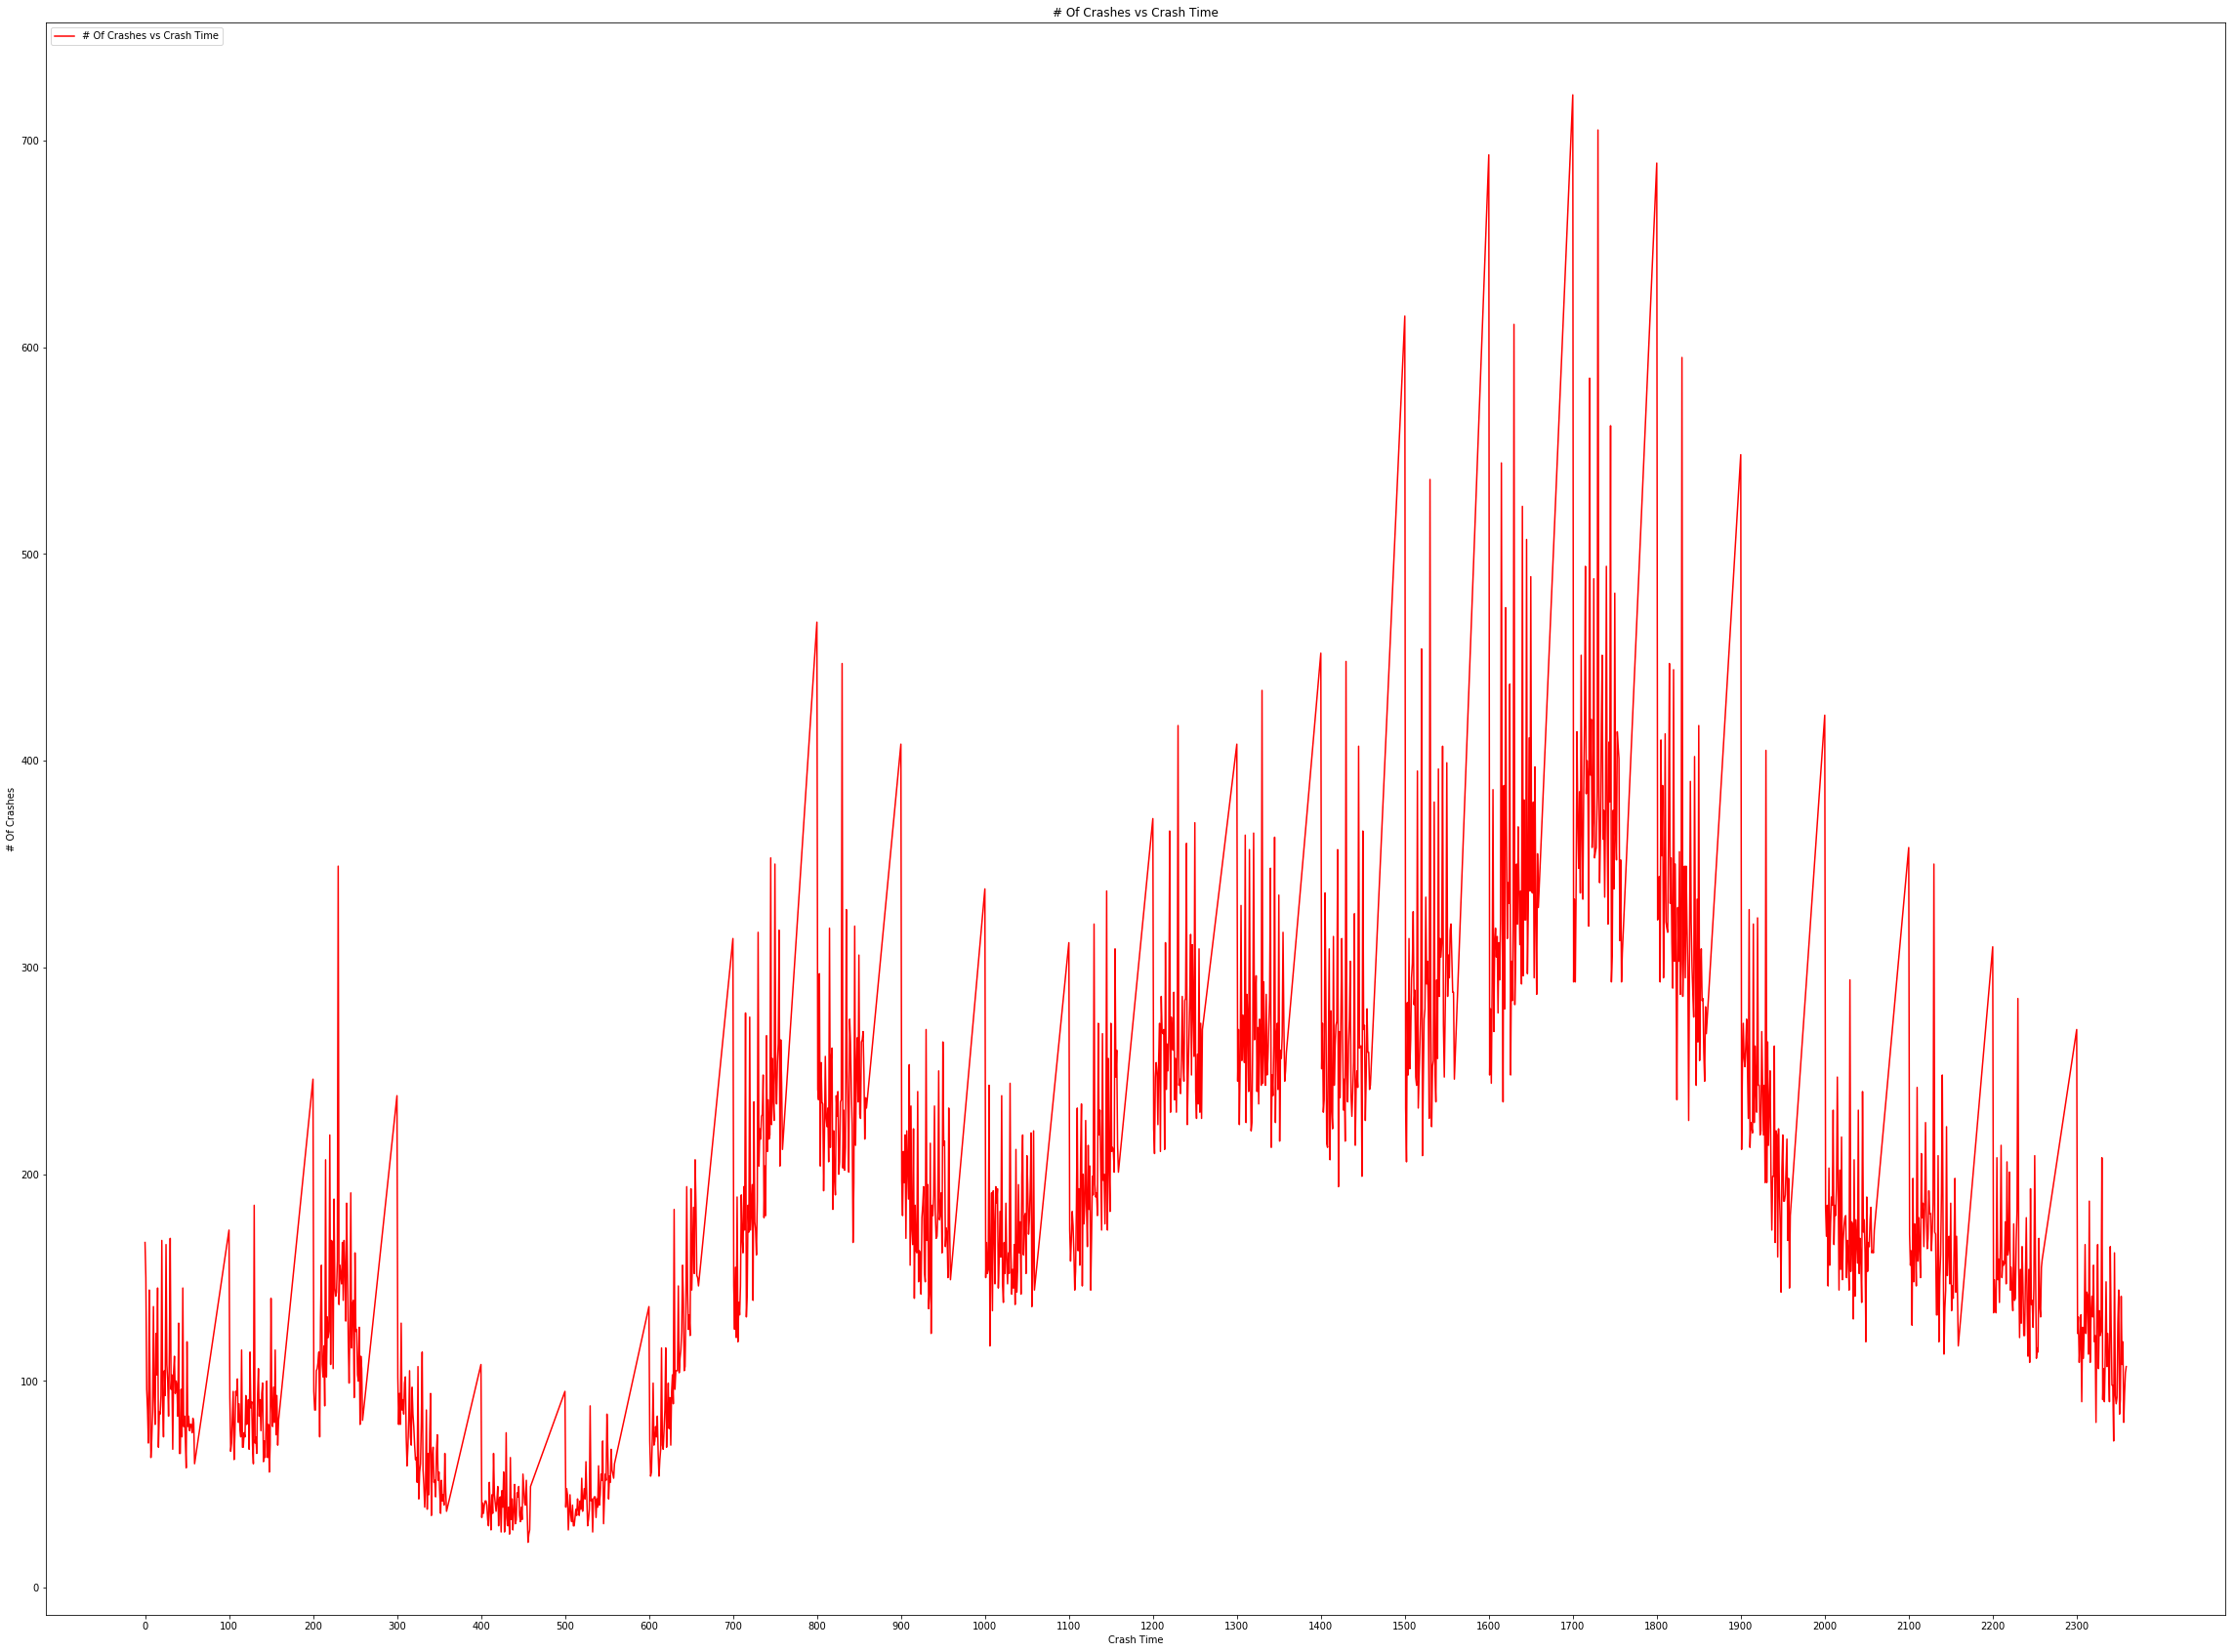

In [23]:
crashTime = "Crash Time"
count = "Count"


crashTimeX = crashTimeDf[crashTime]
crashTimeY = crashTimeDf[count]

plt.figure(figsize=(40,30))
plt.title("# Of Crashes vs Crash Time")
plt.xlabel("Crash Time")
plt.ylabel("# Of Crashes")


plt.plot(crashTimeX, crashTimeY, label = '# Of Crashes vs Crash Time', color = 'red')
plt.xticks(np.arange(min(crashTimeX), max(crashTimeX)+1, 100.0))
plt.legend(loc='upper left')
plt.savefig("CrashesVsCrashTime.png")
plt.show()

In [24]:
dayOfWeekDf = crashesDf['Day of Week'].groupby([crashesDf['Day of Week']]).size().reset_index(name='Count')
dayOfWeekDf.head()

Day of Week  Count
0      Friday  47120
1      Monday  37556
2    Saturday  37852
3      Sunday  31537
4    Thursday  42489

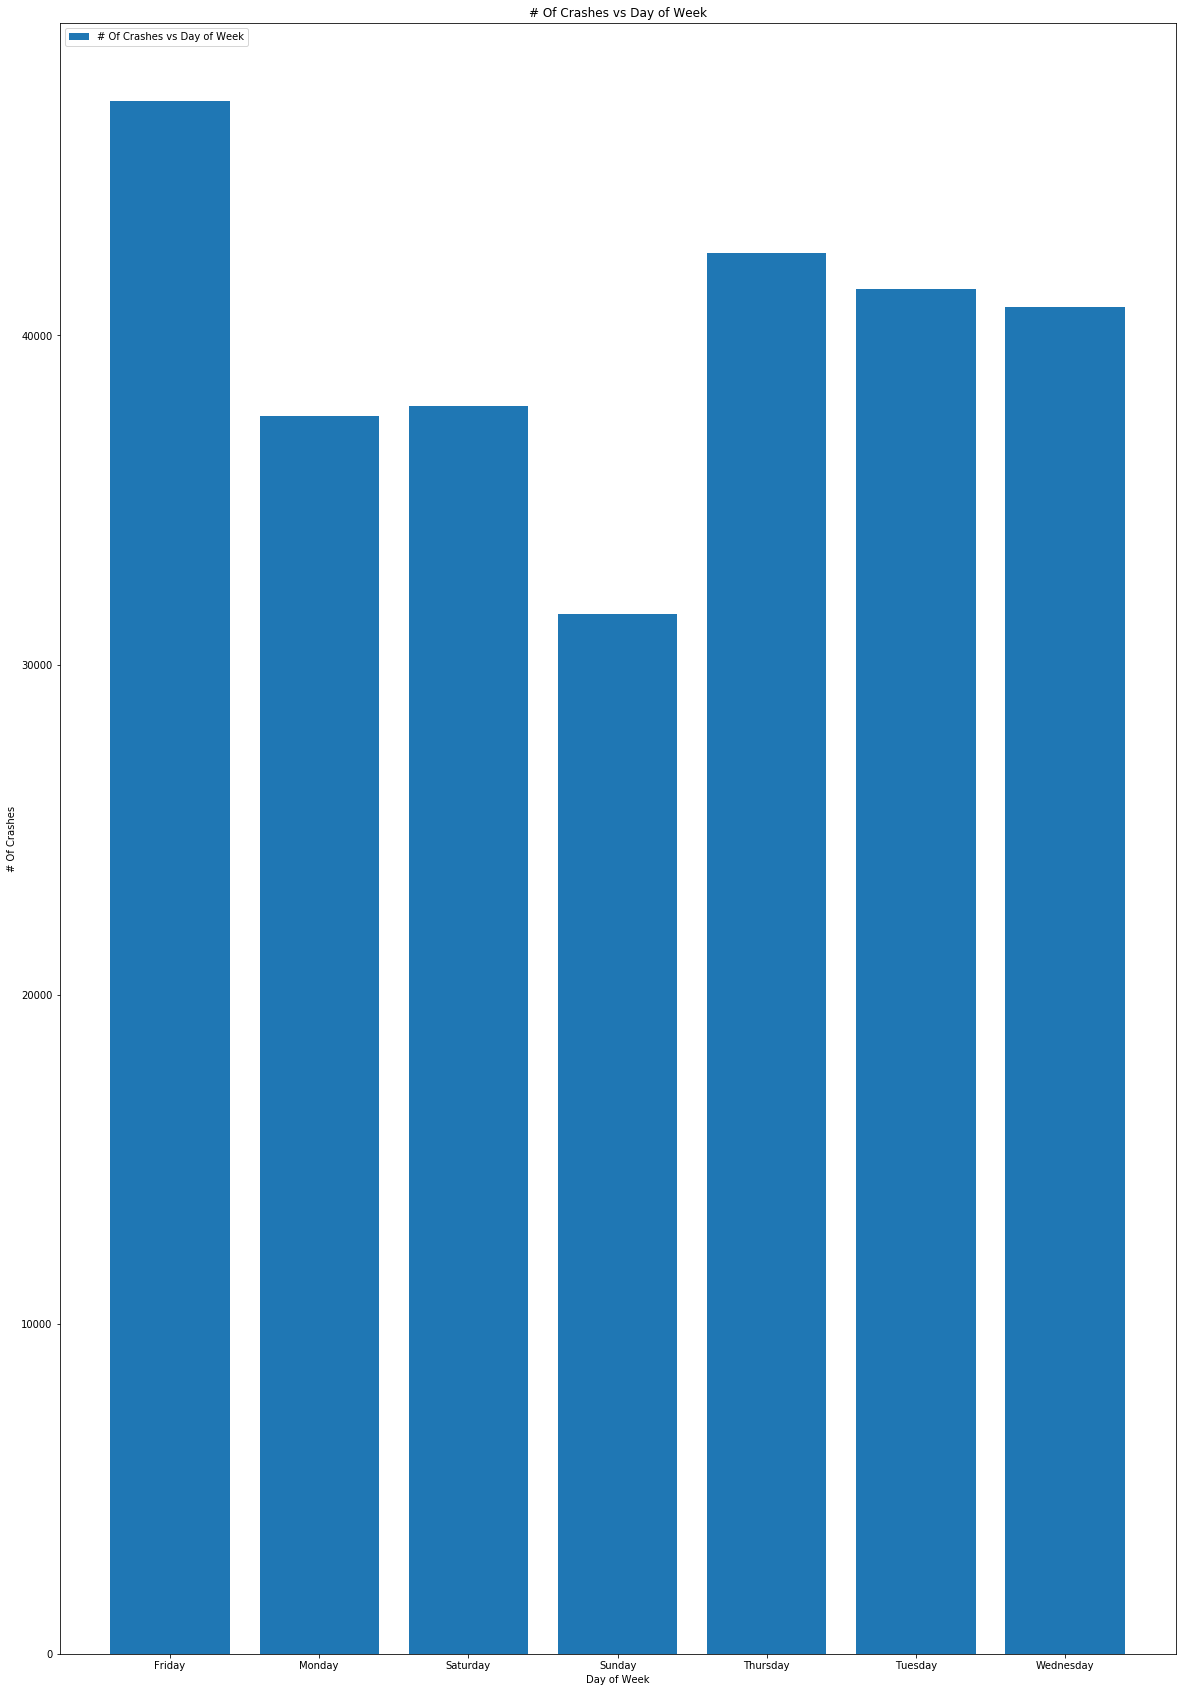

In [25]:
dayOfWeek = "Day of Week"
count = "Count"


dayOfWeekX = dayOfWeekDf[dayOfWeek]
dayOfWeekY = dayOfWeekDf[count]

plt.figure(figsize=(20,30))
plt.title("# Of Crashes vs Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("# Of Crashes")


plt.bar(dayOfWeekX, dayOfWeekY, label = '# Of Crashes vs Day of Week')
plt.legend(loc='upper left')
plt.savefig("CrashesVsDayOfWeek.png")
plt.show()

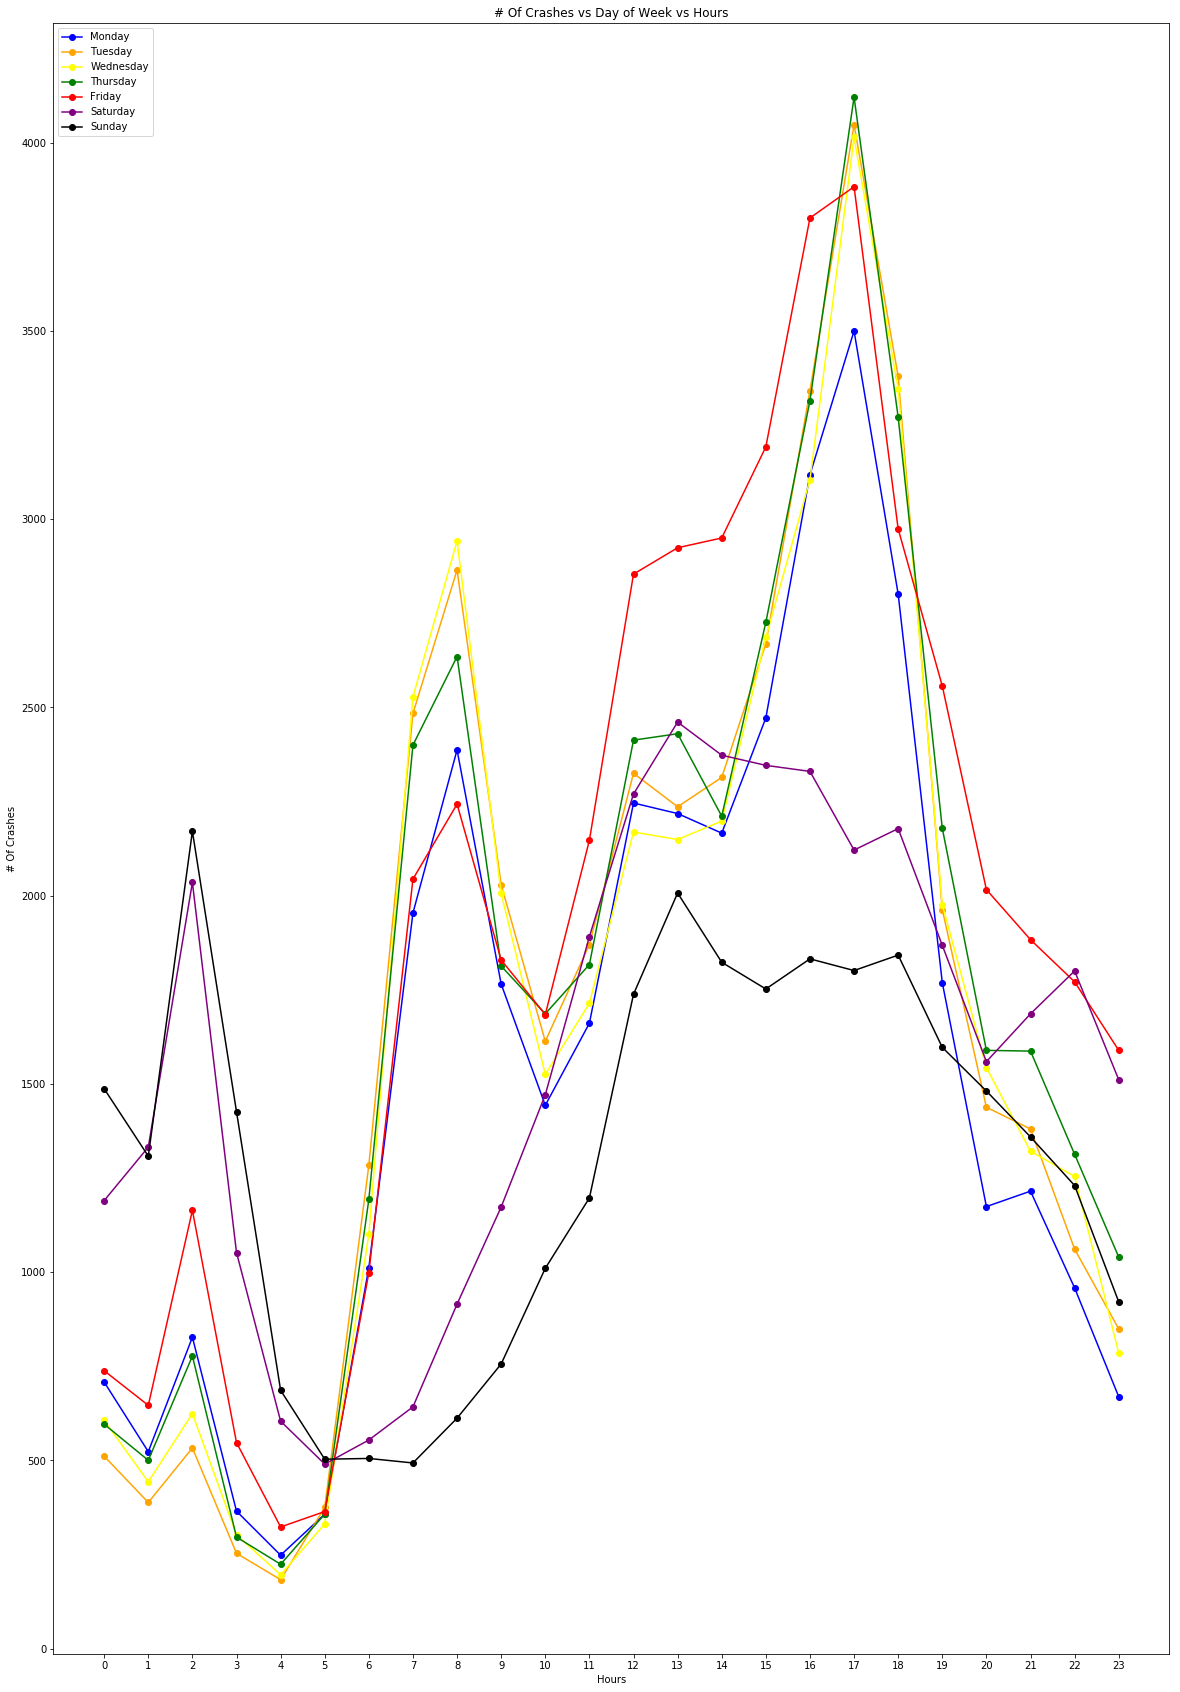

In [26]:
hourCrashTime = "Hour Crash Time"
count = "Count"


hourCrashTimeX = hourCrashTimeDf[hourCrashTime]
hourCrashTimeY = hourCrashTimeDf[count]

mon = crashesDf.loc[crashesDf["Day of Week"] == "Monday"].groupby([crashesDf['Hour Crash Time']]).size().reset_index(name='Count')
tue = crashesDf.loc[crashesDf["Day of Week"] == "Tuesday"].groupby([crashesDf['Hour Crash Time']]).size().reset_index(name='Count')
wed = crashesDf.loc[crashesDf["Day of Week"] == "Wednesday"].groupby([crashesDf['Hour Crash Time']]).size().reset_index(name='Count')
thu = crashesDf.loc[crashesDf["Day of Week"] == "Thursday"].groupby([crashesDf['Hour Crash Time']]).size().reset_index(name='Count')
fri = crashesDf.loc[crashesDf["Day of Week"] == "Friday"].groupby([crashesDf['Hour Crash Time']]).size().reset_index(name='Count')
sat = crashesDf.loc[crashesDf["Day of Week"] == "Saturday"].groupby([crashesDf['Hour Crash Time']]).size().reset_index(name='Count')
sun = crashesDf.loc[crashesDf["Day of Week"] == "Sunday"].groupby([crashesDf['Hour Crash Time']]).size().reset_index(name='Count')

plt.figure(figsize=(20,30))
plt.title("# Of Crashes vs Day of Week vs Hours")
plt.xlabel("Hours")
plt.ylabel("# Of Crashes")

plt.plot(mon[hourCrashTime], mon[count], marker='o', markersize=6, color="blue", label = 'Monday')
plt.plot(tue[hourCrashTime], tue[count], marker='o', markersize=6, color="orange", label = 'Tuesday')
plt.plot(wed[hourCrashTime], wed[count], marker='o', markersize=6, color="yellow", label = 'Wednesday')
plt.plot(thu[hourCrashTime], thu[count], marker='o', markersize=6, color="green", label = 'Thursday')
plt.plot(fri[hourCrashTime], fri[count], marker='o', markersize=6, color="red", label = 'Friday')
plt.plot(sat[hourCrashTime], sat[count], marker='o', markersize=6, color="purple", label = 'Saturday')
plt.plot(sun[hourCrashTime], sun[count], marker='o', markersize=6, color="black", label = 'Sunday')
plt.xticks(np.arange(min(hourCrashTimeX), max(hourCrashTimeX)+1, 1.0))
#plt.plot(hourCrashTimeX, hourCrashTimeY, label = '# Of Crashes vs Day of Week vs Hours')
plt.legend(loc='upper left')
plt.savefig("CrashesVsDayOfWeekVsHours.png")
plt.show()

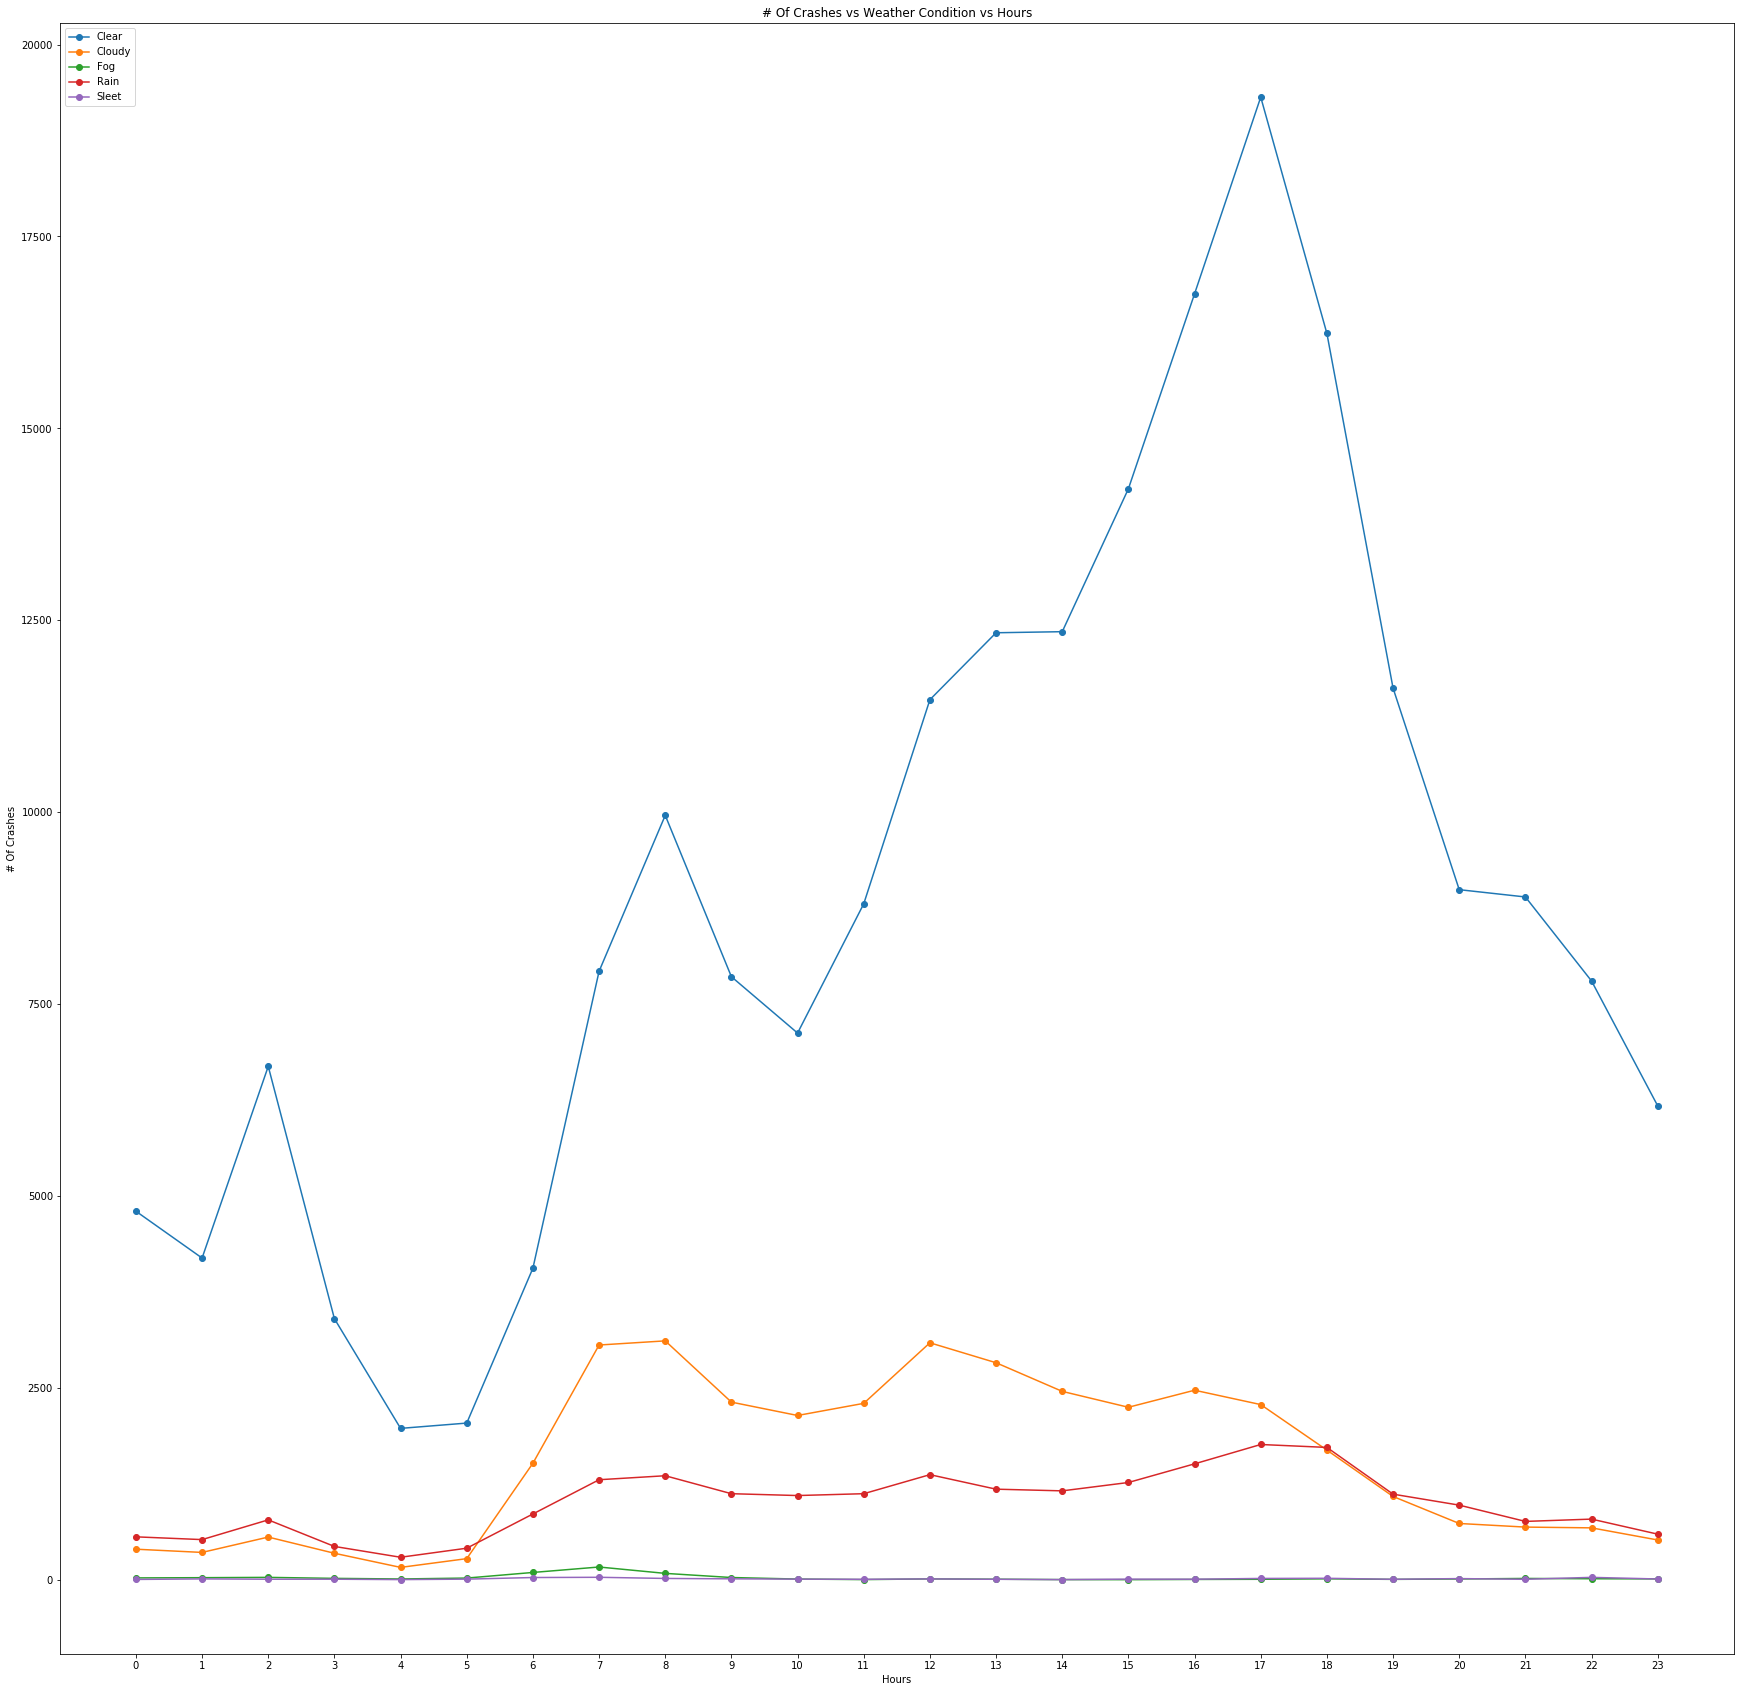

In [27]:
hourCrashTime = "Hour Crash Time"
count = "Count"


hourCrashTimeX = hourCrashTimeDf[hourCrashTime]
hourCrashTimeY = hourCrashTimeDf[count]

clear = crashesDf.loc[crashesDf["Weather Condition"] == "Clear"].groupby([crashesDf['Hour Crash Time']]).size().reset_index(name='Count')
cloudy = crashesDf.loc[crashesDf["Weather Condition"] == "Cloudy"].groupby([crashesDf['Hour Crash Time']]).size().reset_index(name='Count')
fog = crashesDf.loc[crashesDf["Weather Condition"] == "Fog"].groupby([crashesDf['Hour Crash Time']]).size().reset_index(name='Count')
rain = crashesDf.loc[crashesDf["Weather Condition"] == "Rain"].groupby([crashesDf['Hour Crash Time']]).size().reset_index(name='Count')
sleet = crashesDf.loc[crashesDf["Weather Condition"] == "Sleet/Hail"].groupby([crashesDf['Hour Crash Time']]).size().reset_index(name='Count')

plt.figure(figsize=(30,30))
plt.title("# Of Crashes vs Weather Condition vs Hours")
plt.xlabel("Hours")
plt.ylabel("# Of Crashes")

plt.plot(clear[hourCrashTime], clear[count], marker='o', markersize=6, label = 'Clear')
plt.plot(cloudy[hourCrashTime], cloudy[count], marker='o', markersize=6, label = 'Cloudy')
plt.plot(fog[hourCrashTime], fog[count], marker='o', markersize=6, label = 'Fog')
plt.plot(rain[hourCrashTime], rain[count], marker='o', markersize=6, label = 'Rain')
plt.plot(sleet[hourCrashTime], sleet[count],  marker='o', markersize=6,label = 'Sleet')

plt.xticks(np.arange(min(hourCrashTimeX), max(hourCrashTimeX)+1, 1.0))

plt.legend(loc='upper left')
plt.savefig("CrashesVsWeatherVsHours.png")
plt.show()

In [28]:
speedLimitDf = crashesDf['Speed Limit'].groupby([crashesDf['Speed Limit']]).size().reset_index(name='Count')
speedLimitDf.head()

Speed Limit  Count
0           -1  44971
1            0  25722
2            5    512
3            6      9
4            7      7

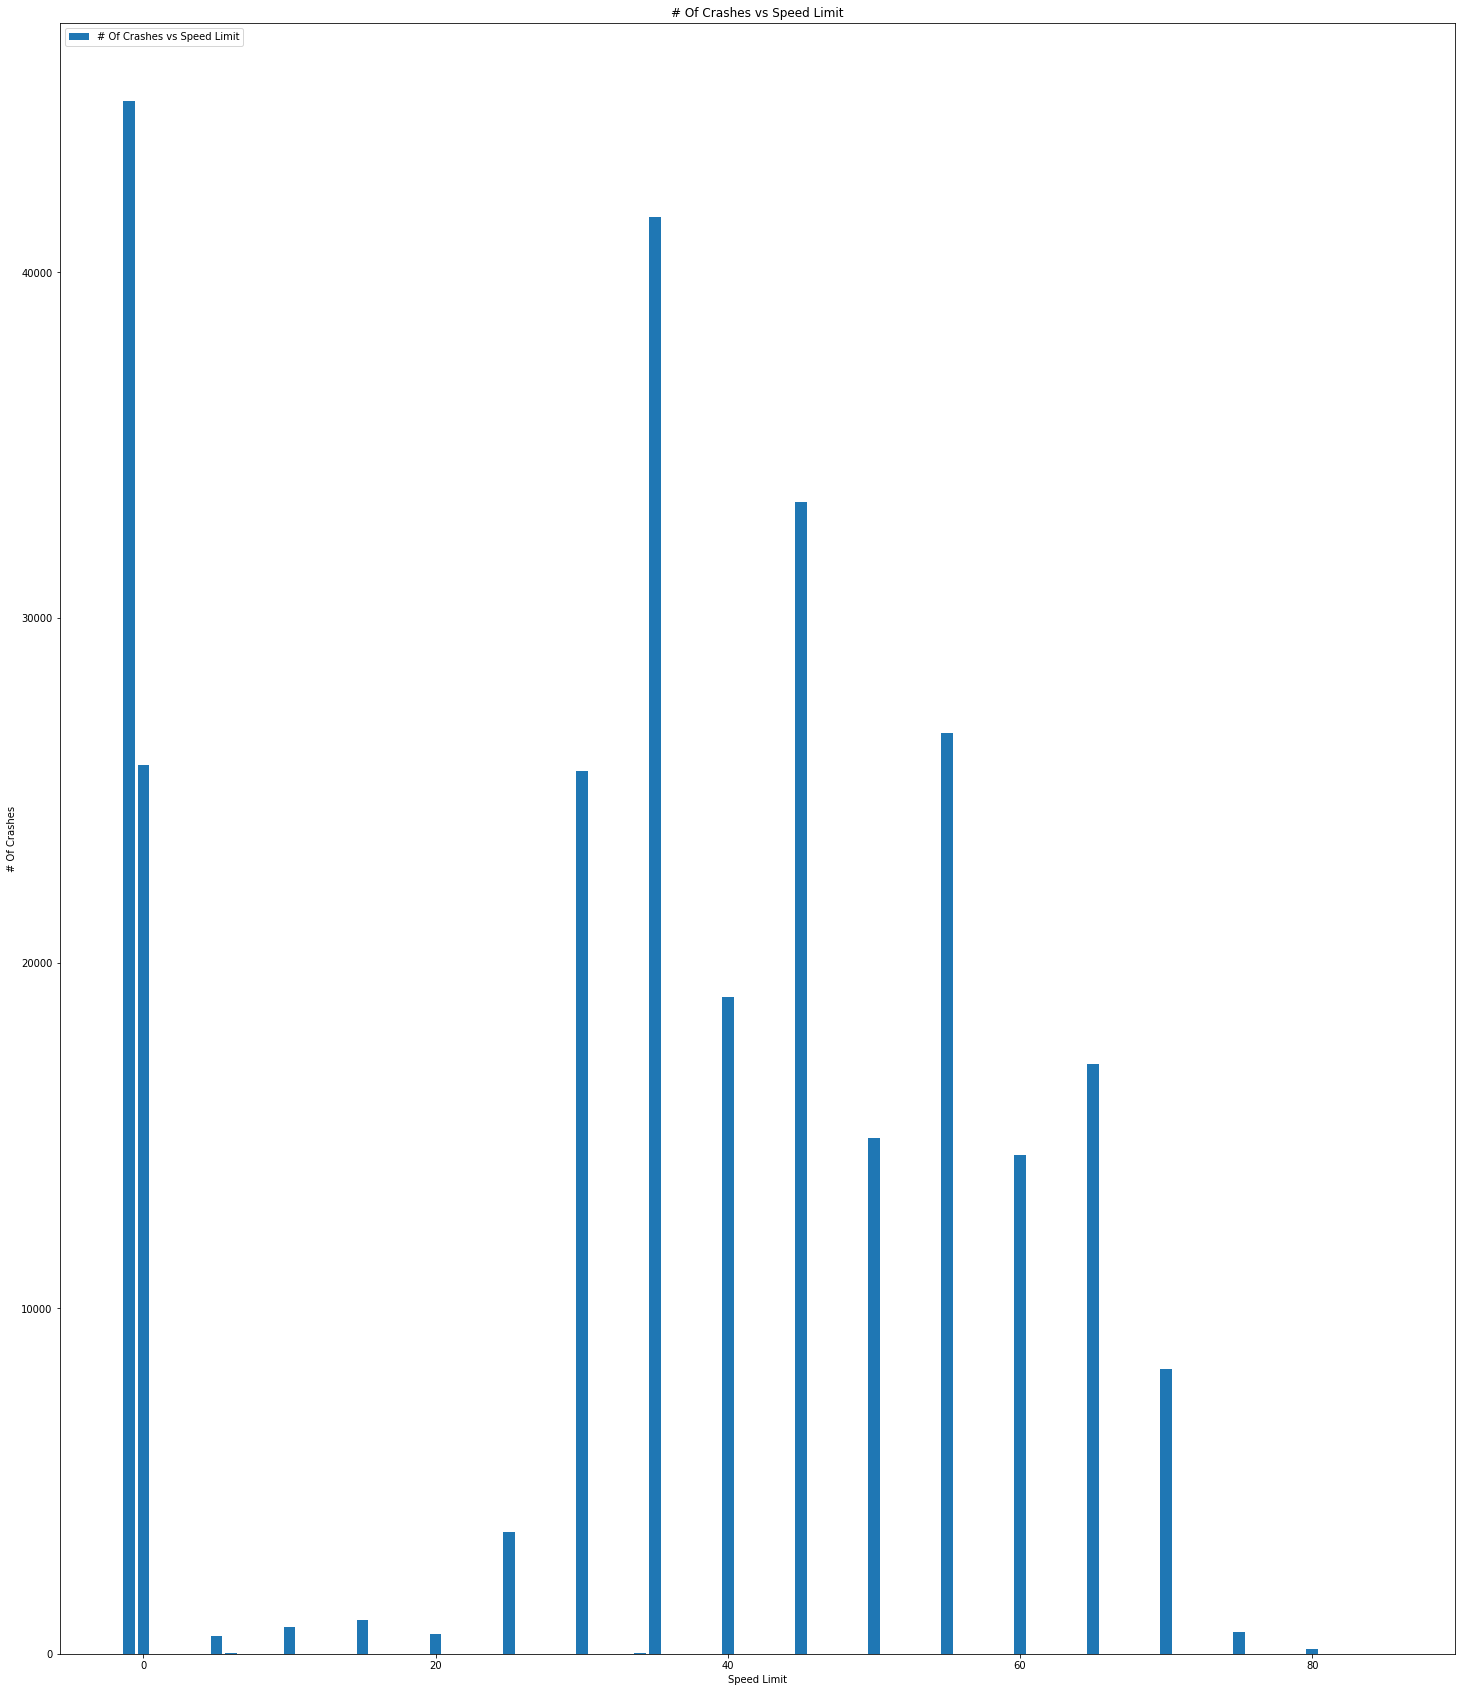

In [29]:
speedLimit = "Speed Limit"
count = "Count"


speedLimitX = speedLimitDf[speedLimit]
speedLimitY = speedLimitDf[count]

plt.figure(figsize=(25,30))
plt.title("# Of Crashes vs Speed Limit")
plt.xlabel("Speed Limit")
plt.ylabel("# Of Crashes")


plt.bar(speedLimitX, speedLimitY, label = '# Of Crashes vs Speed Limit')
plt.legend(loc='upper left')
plt.savefig("CrashesVsSpeedLimit.png")
plt.show()

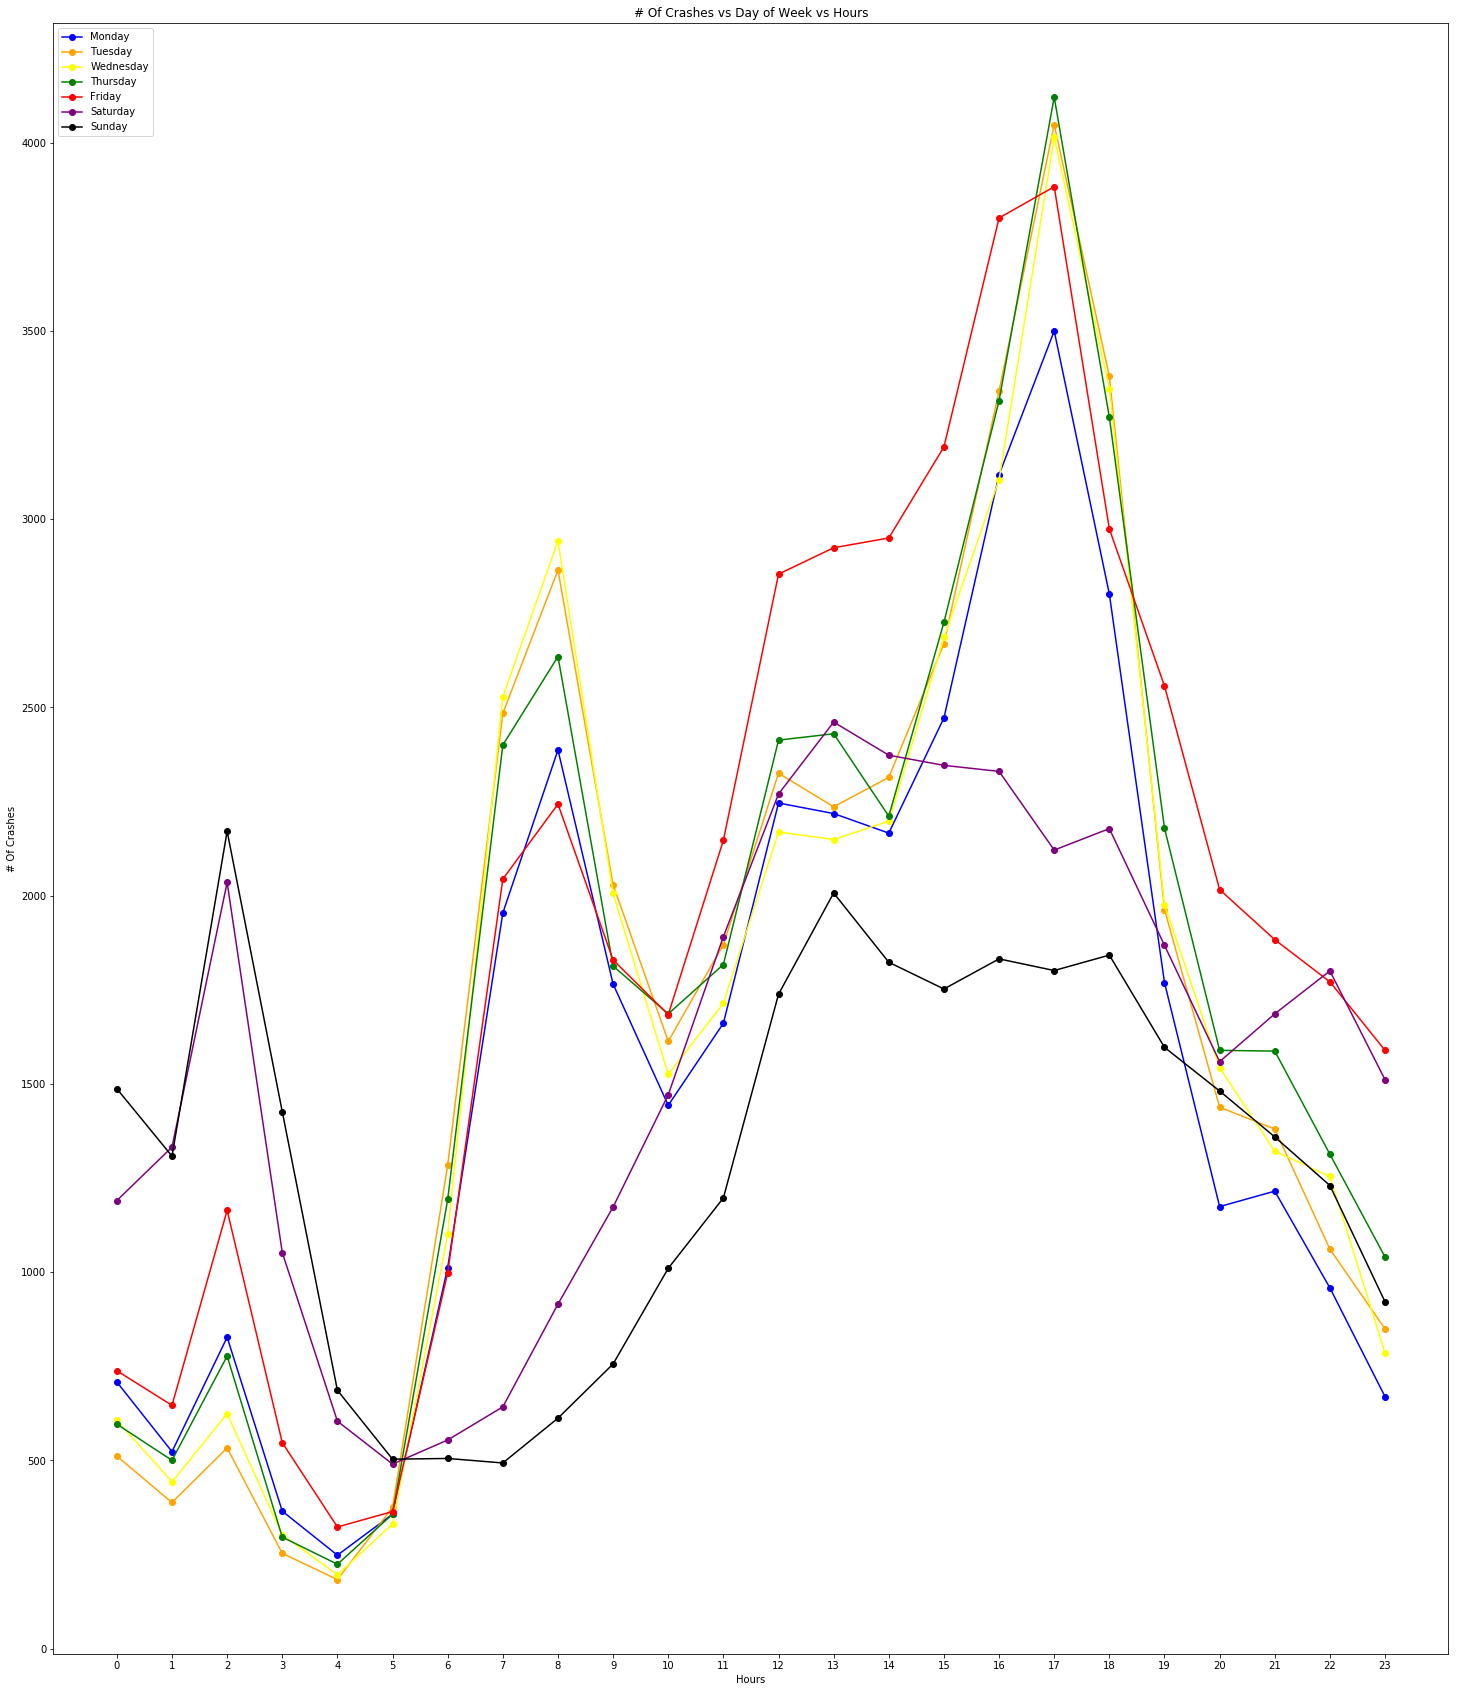

In [30]:
hourCrashTime = "Hour Crash Time"
count = "Count"


hourCrashTimeX = hourCrashTimeDf[hourCrashTime]
hourCrashTimeY = hourCrashTimeDf[count]

mon = crashesDf.loc[crashesDf["Day of Week"] == "Monday"].groupby([crashesDf['Hour Crash Time']]).size().reset_index(name='Count')
tue = crashesDf.loc[crashesDf["Day of Week"] == "Tuesday"].groupby([crashesDf['Hour Crash Time']]).size().reset_index(name='Count')
wed = crashesDf.loc[crashesDf["Day of Week"] == "Wednesday"].groupby([crashesDf['Hour Crash Time']]).size().reset_index(name='Count')
thu = crashesDf.loc[crashesDf["Day of Week"] == "Thursday"].groupby([crashesDf['Hour Crash Time']]).size().reset_index(name='Count')
fri = crashesDf.loc[crashesDf["Day of Week"] == "Friday"].groupby([crashesDf['Hour Crash Time']]).size().reset_index(name='Count')
sat = crashesDf.loc[crashesDf["Day of Week"] == "Saturday"].groupby([crashesDf['Hour Crash Time']]).size().reset_index(name='Count')
sun = crashesDf.loc[crashesDf["Day of Week"] == "Sunday"].groupby([crashesDf['Hour Crash Time']]).size().reset_index(name='Count')

plt.figure(figsize=(25,30))
plt.title("# Of Crashes vs Day of Week vs Hours")
plt.xlabel("Hours")
plt.ylabel("# Of Crashes")

plt.plot(mon[hourCrashTime], mon[count], marker='o', markersize=6, color="blue", label = 'Monday')
plt.plot(tue[hourCrashTime], tue[count], marker='o', markersize=6, color="orange", label = 'Tuesday')
plt.plot(wed[hourCrashTime], wed[count], marker='o', markersize=6, color="yellow", label = 'Wednesday')
plt.plot(thu[hourCrashTime], thu[count], marker='o', markersize=6, color="green", label = 'Thursday')
plt.plot(fri[hourCrashTime], fri[count], marker='o', markersize=6, color="red", label = 'Friday')
plt.plot(sat[hourCrashTime], sat[count], marker='o', markersize=6, color="purple", label = 'Saturday')
plt.plot(sun[hourCrashTime], sun[count], marker='o', markersize=6, color="black", label = 'Sunday')
plt.xticks(np.arange(min(hourCrashTimeX), max(hourCrashTimeX)+1, 1.0))
#plt.plot(hourCrashTimeX, hourCrashTimeY, label = '# Of Crashes vs Day of Week vs Hours')
plt.legend(loc='upper left')
plt.savefig("CrashesVsDayOfWeekVsHours.png")
plt.show()

In [31]:
vehicleColorDf = crashesDf['Vehicle Color'].groupby([crashesDf['Vehicle Color']]).size().reset_index(name='Count')
vehicleColorDf.head()

Vehicle Color  Count
0            -1   2036
1         Beige   3562
2         Black  47357
3          Blue  26001
4        Bronze    369

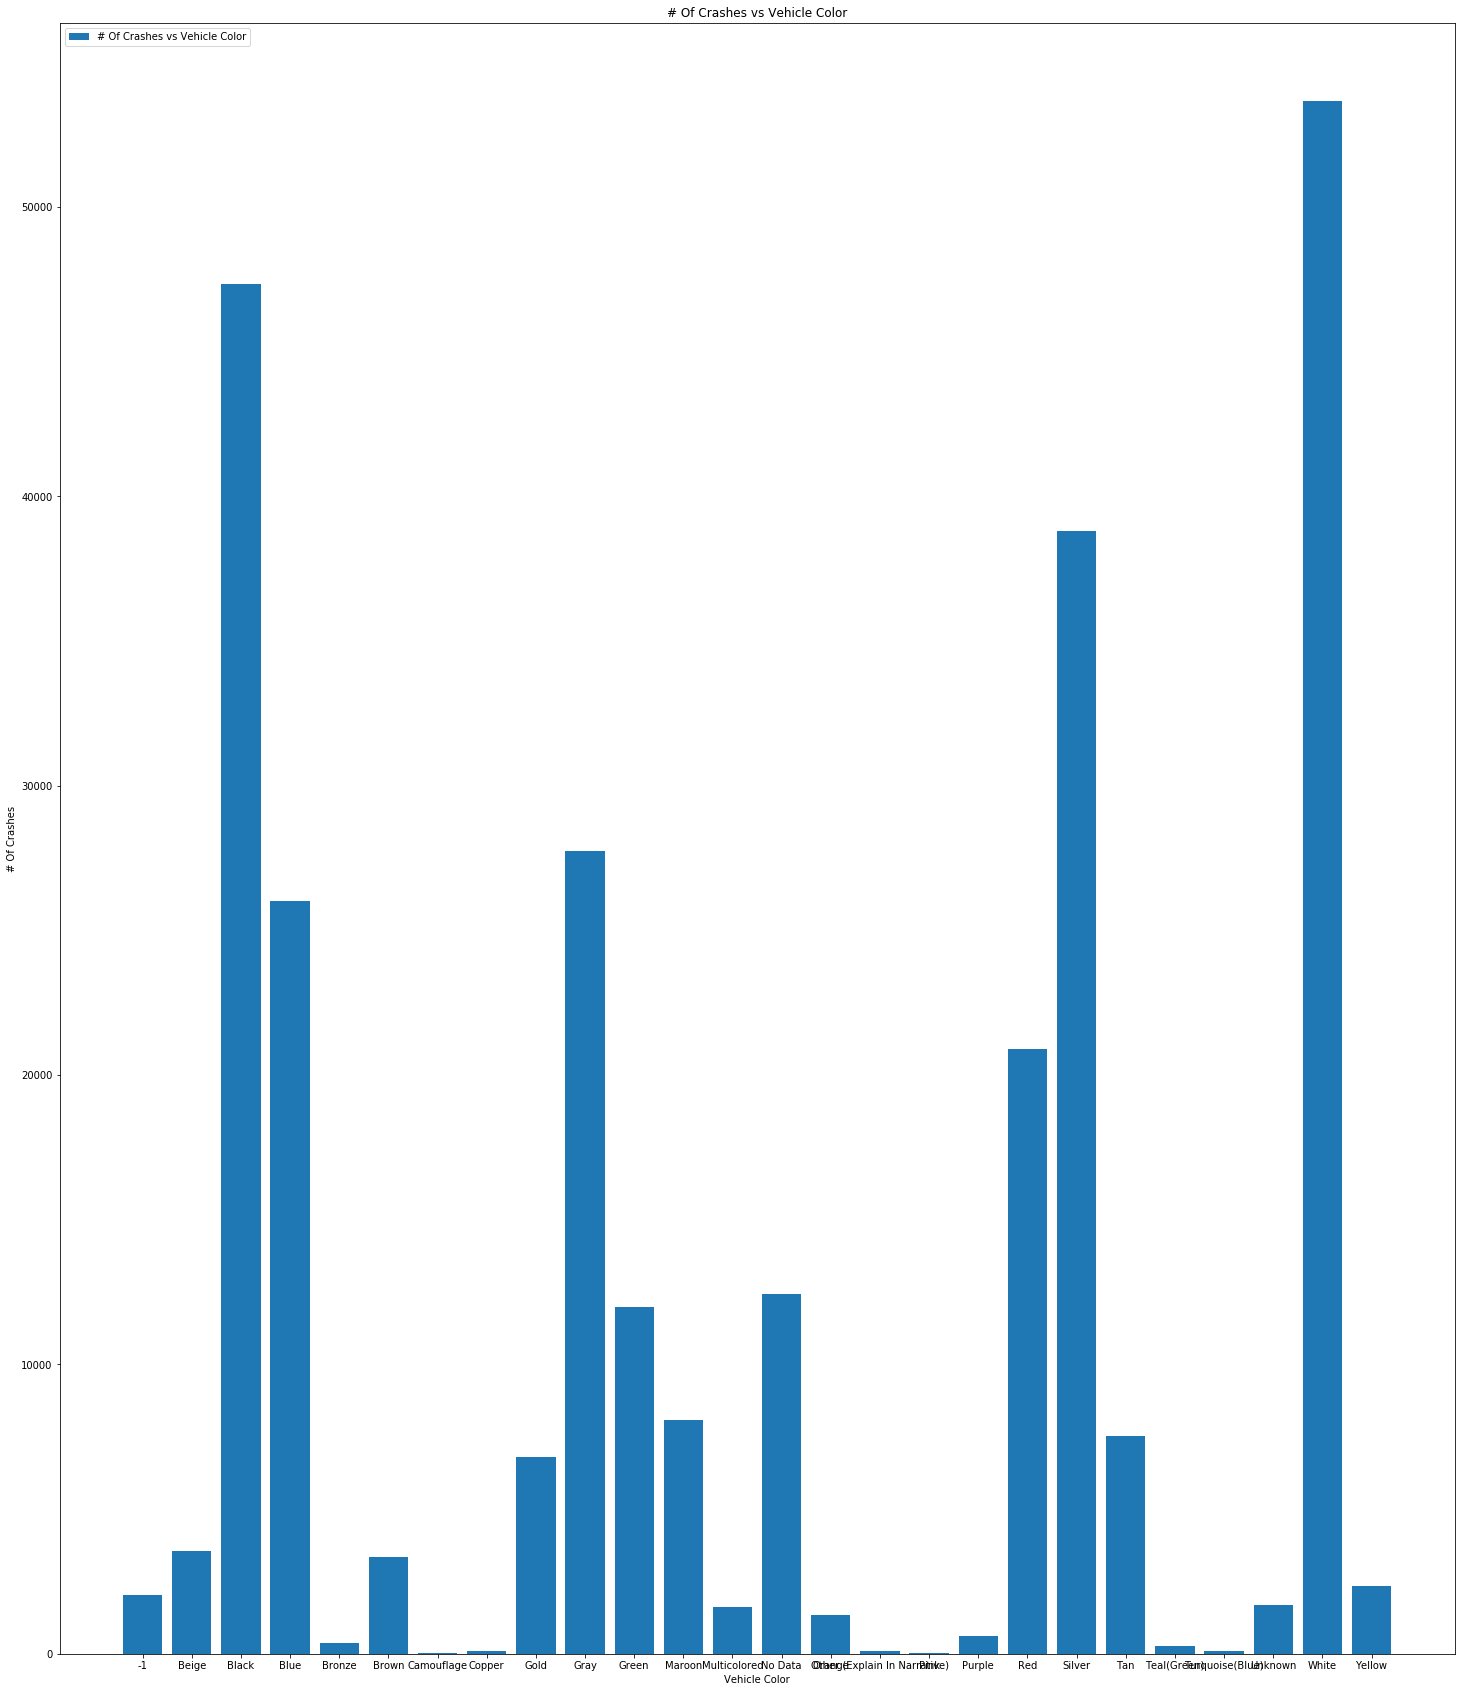

In [32]:
vehicleColor = "Vehicle Color"
count = "Count"


vehicleColorX = vehicleColorDf[vehicleColor]
vehicleColorY = vehicleColorDf[count]

plt.figure(figsize=(25,30))
plt.title("# Of Crashes vs Vehicle Color")
plt.xlabel("Vehicle Color")
plt.ylabel("# Of Crashes")


plt.bar(vehicleColorX, vehicleColorY, label = '# Of Crashes vs Vehicle Color')
plt.legend(loc='upper left')
plt.savefig("CrashesVsVehicleColor.png")
plt.show()

In [33]:
yearlyDf = crashesDf['Crash Year'].groupby([crashesDf['Crash Year']]).size().reset_index(name='Count')
yearlyDf.head()

Crash Year  Count
0        2010  26089
1        2011  26523
2        2012  30202
3        2013  30279
4        2014  30149

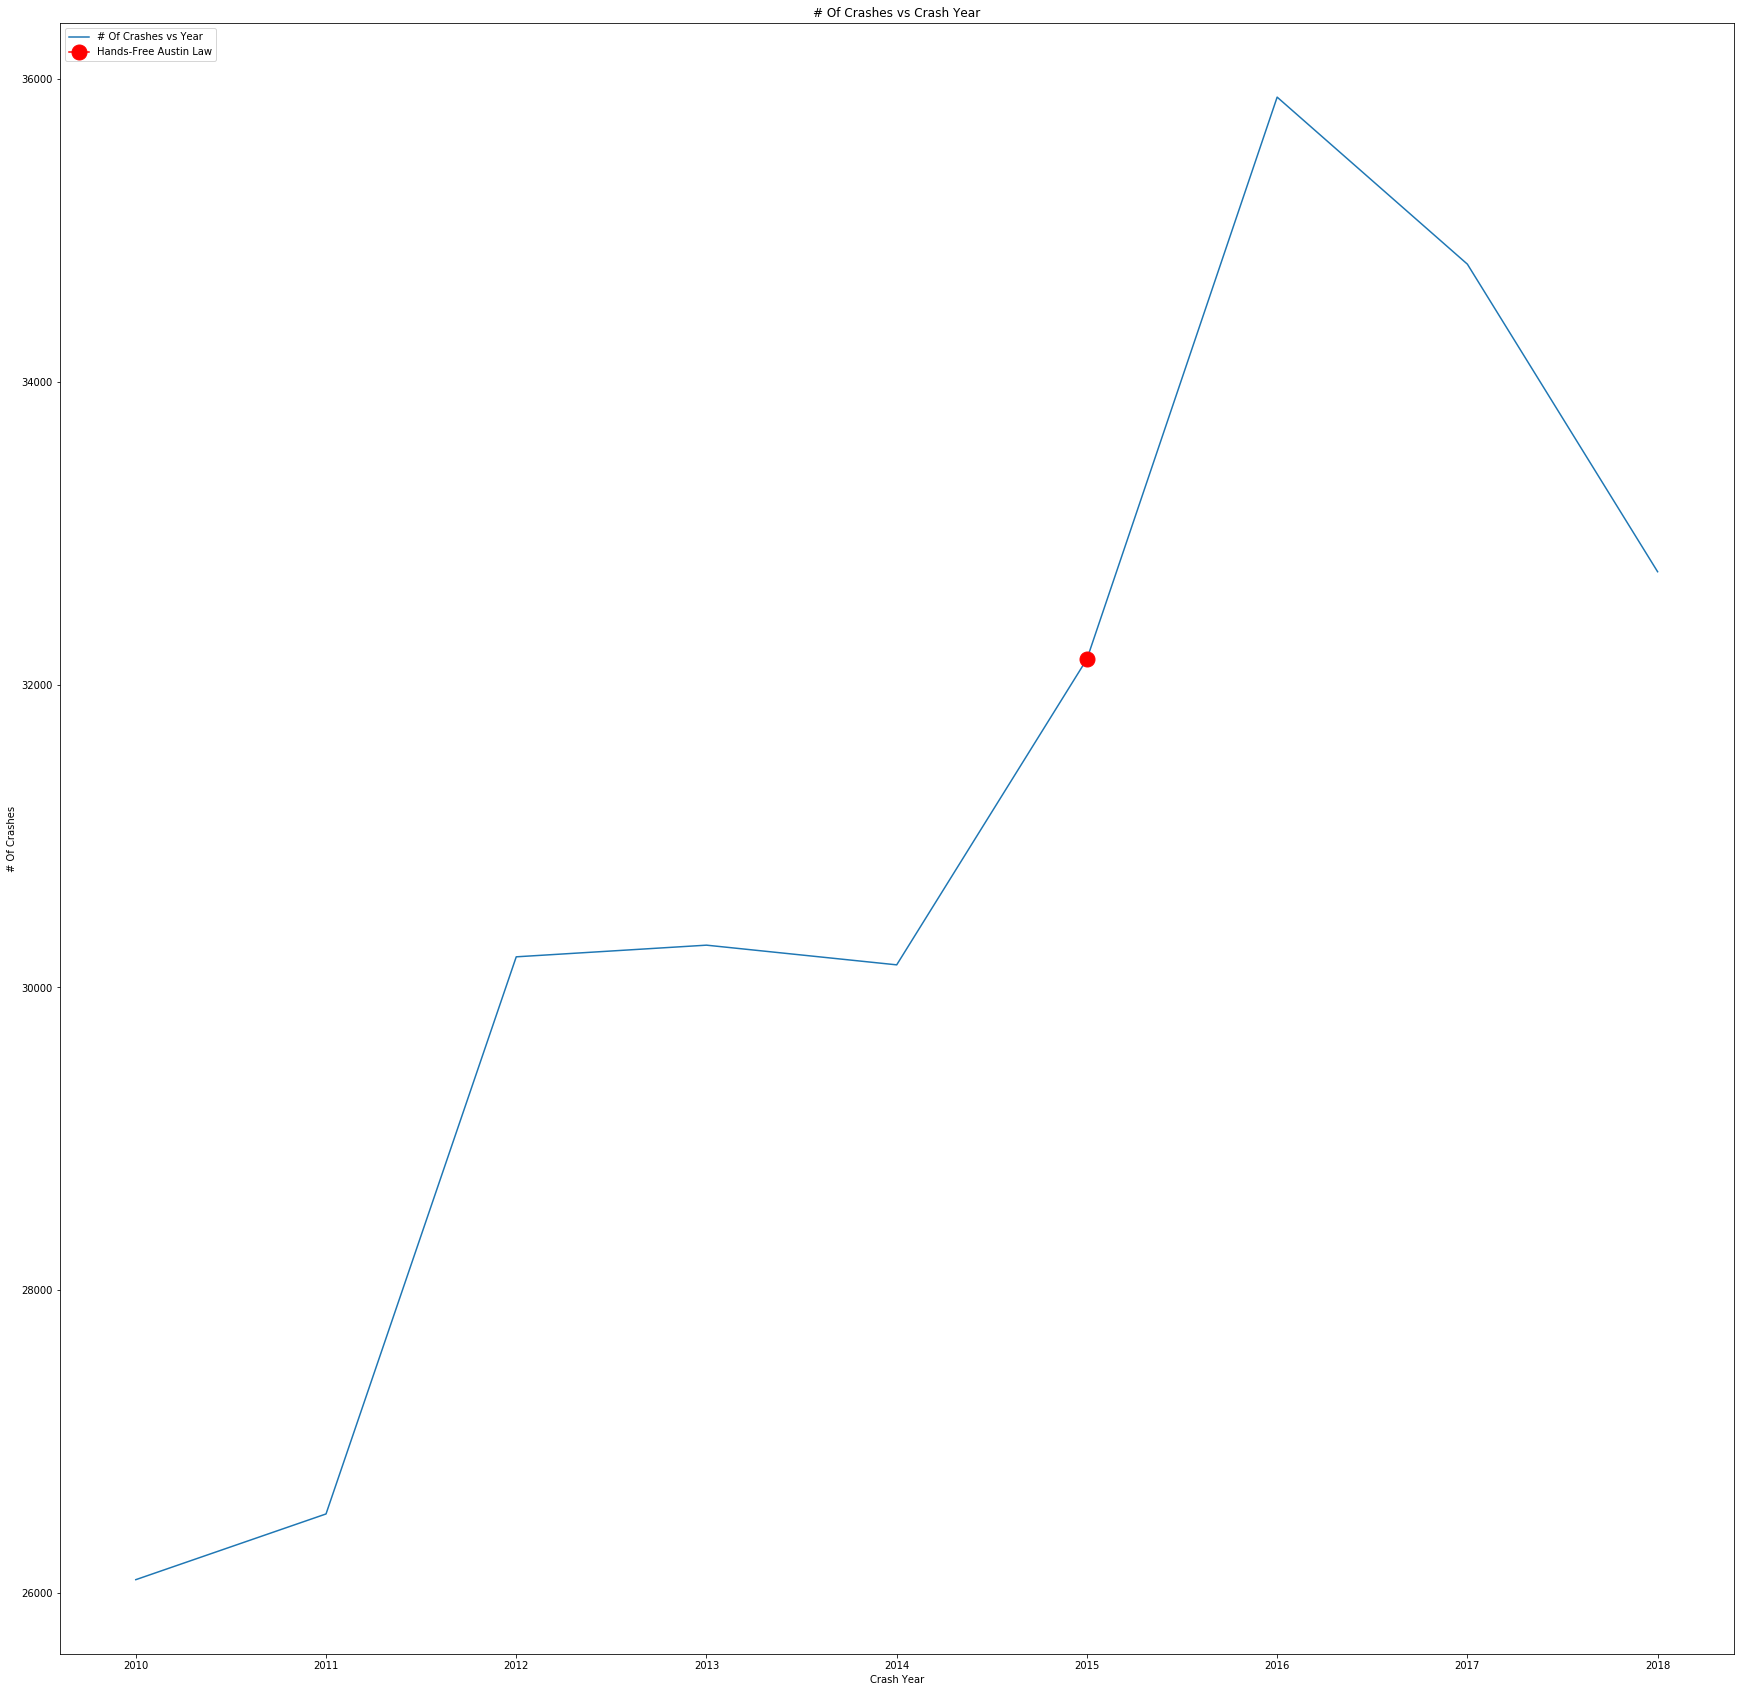

In [34]:
crashYear = "Crash Year"
count = "Count"


yearX = yearlyDf[crashYear]
yearY = yearlyDf[count]

plt.figure(figsize=(30,30))
plt.title("# Of Crashes vs Crash Year")
plt.xlabel("Crash Year")
plt.ylabel("# Of Crashes")

handsFreeAustin = yearlyDf.loc[yearlyDf[crashYear] == 2015]

plt.plot(yearX, yearY, label = '# Of Crashes vs Year')

plt.plot(handsFreeAustin[crashYear], handsFreeAustin[count], marker='o', markersize=15, color="red", label = "Hands-Free Austin Law")

plt.legend(loc='upper left')
plt.savefig("CrashesVsYear.png")
plt.show()

<b>Question - </b>
Does the day of the week or the hour of the day have an effect on number of traffic accidents?